# Indian Cars: Data Analysis and Visualization

* Around 3.34 Lakh passenger cars were sold in the Indian market in May 2023. The sales increased by over 13% when compared to May last year. The Top 25 Selling Cars constituted over 75% of the cars sold in April 2023.

* This dataset consists of 141 columns. Perform Exploratory Data analysis on this dataset. Document the findings and insights using proper graphs to represent the data.

In [600]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

## Preprocessing & analyzing.



### Basic Cleanning

In [601]:
data = pd.read_csv('https://raw.githubusercontent.com/rajvalvi/Prepinsta-Winter-Internship-in-Data-Analytics/main/week-6/Indian_cars_data.csv',index_col=0)

In [602]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Data columns (total 140 columns):
 #    Column                                     Non-Null Count  Dtype  
---   ------                                     --------------  -----  
 0    Make                                       1201 non-null   object 
 1    Model                                      1276 non-null   object 
 2    Variant                                    1276 non-null   object 
 3    Ex-Showroom_Price                          1276 non-null   object 
 4    Displacement                               1264 non-null   object 
 5    Cylinders                                  1210 non-null   float64
 6    Valves_Per_Cylinder                        1174 non-null   float64
 7    Drivetrain                                 1269 non-null   object 
 8    Cylinder_Configuration                     1263 non-null   object 
 9    Emission_Norm                              1265 non-null   object 
 10   Engine_Loc

<ipython-input-602-83ed814146b6>:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



In [603]:
data.shape

(1276, 140)

In [604]:
data.sample(5)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
60,Tata,Tiago,Revotron Xza Plus,"Rs. 6,49,000",1199 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676,Mahindra,Xuv500,W7,"Rs. 14,18,313",2179 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
719,Jeep,Compass,2.0 Limited,"Rs. 19,73,000",1956 cc,6.0,4.0,FWD (Front Wheel Drive),V,BS 6,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
40,Datsun,Go,T Vdc,"Rs. 5,28,464",1198 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675,Mahindra,Xuv500,G At,"Rs. 16,10,180",2179 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN


### Handling Missing values



*   Following data is so huge so wo removing columns who has less than 70% data



In [605]:
def rem_col(total,cols):
    for col in cols:
        nan_vals = data[col].isna().sum()  # calculating null values of each column
        per = nan_vals / total * 100       # calculating percentage
        if(per>=70):                       # if null values are less than 70 %
            del data[col]                  # removing columns who has less than 70% vales
    print("Shape of the data : ",data.shape)
cols = data.columns    # Columns present the data
total = data.shape[0]  # total values
rem_col(total,cols)

Shape of the data :  (1276, 115)


After performing above operation shape of the data is changed this (1276, 140) to this (1276, 115)

### Duplicates

In [606]:
data.duplicated().sum() # Cheking duplicated

9

There are 9 duplicate values so we are going to remove it.

In [607]:
data.drop_duplicates(inplace = True) # removing duplicates
data.duplicated().sum()              # cheking duplicates for confirmation

0

All Duplicate values are removed

* Removing Unnecessary columns

In [608]:
del data['Average_Fuel_Consumption']
del data['Distance_to_Empty']
del data['Extended_Warranty']

### 1. Make column
* This column has name of car maker company.

In [609]:
print("Data Type : ",data['Make'].dtype)
print()
print("Number Of car makers: ",data['Make'].nunique())
print()
print("NaN values : ",data['Make'].isna().sum())
print()
print(data['Make'].unique())


Data Type :  object

Number Of car makers:  39

NaN values :  75

['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' nan 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw' 'Land Rover'
 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley' 'Ferrari'
 'Aston Martin' 'Bugatti' 'Bajaj' 'Icml' 'Force' 'Mg' 'Kia'
 'Land Rover Rover' 'Mitsubishi' 'Maruti Suzuki R']


Here we have totak 39 car makers but there are 75 NaN values so we are going to extract maker names from respective car model.

eg:- Mercedes-Benz Cla-Class, but here is Mercedes-Benz is Make and  Cla-Class is Model so we replacing it with NaN

### 2. Model column

In [610]:
print("Data Type : ",data['Make'].dtype)
print()
print("Number Of car modoles: ",data['Model'].nunique())
print()
print("NaN values : ",data['Model'].isna().sum())
print()
print(data['Model'].unique())


Data Type :  object

Number Of car modoles:  263

NaN values :  0

['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Cabriolet' 'A6' 'X3'
 'Discovery Sport' 'S90' 'S5' 'X5' 'Mustang' 'Grand Cherokee'
 'Mercedes-Benz E-Class Cabriolet' 'M2 Competition' '718'
 'Mercedes-Benz Gls' 'Land Cruiser Prado' 'Rx 450H' 'Rs5' '7-Series' 'Q8'
 'Mercedes-Benz S-Class' 'Levante' 'Mercedes-Benz G-Class' 'A8 L'
 'Granturismo' 'Quattroporte' 'Lc 500H' 'Mercedes-Benz Maybach' 'Panamera'

Here, we can see there are 259 different Models and 0 NaN values but,

There are some values like Mercedes-Benz Cla-Class here we can see Mercedes-Benz is Makers so we are going to remove it.

Using **make_fill_na** function we are goint to fill NaN values from Make and

removing maker name from model

In [611]:
def make_fill_na(total_rows):
    for i in range(total_rows):
        make=data.loc[i:i,['Make']].to_string()[-3:]
        if(make == 'NaN'):
            model = data.loc[i, 'Model']
            new_make = model.split()[0]
            data.loc[i:i,['Make']] = new_make
            new_model = model.split()[-1]
            data.loc[i:i,['Model']] = new_model
total_rows=data.shape[0]
make_fill_na(total_rows)

In [612]:
print("NaN values : ",data['Make'].isna().sum()) # Cheking null values of Make column

NaN values :  0


### 3. Varient column

In [613]:
print("Data Type : ",data['Variant'].dtype)
print()
print("Number Of car Variants: ",data['Variant'].nunique())
print()
print("NaN values : ",data['Variant'].isna().sum())
print()
print(data['Variant'].unique())


Data Type :  object

Number Of car Variants:  1064

NaN values :  0

['Xt' 'Xe' 'Emax Xm' ... 'Zx Mt Diesel' 'Zx Cvt Petrol' '3.2 At']


* In variant column There is no NaN value or Nothing to update or change so we go to next column.

### 4. Ex-Showroom_Price Column

In [614]:
print("Data Type : ",data['Ex-Showroom_Price'].dtype)
print()
print("NaN values : ",data['Ex-Showroom_Price'].isna().sum())
print()
print(data.loc[:5,['Ex-Showroom_Price']])

Data Type :  object

NaN values :  0

  Ex-Showroom_Price
0      Rs. 2,92,667
1      Rs. 2,36,447
2      Rs. 2,96,661
3      Rs. 3,34,768
4      Rs. 2,72,223
5      Rs. 3,14,815




*   Ex-Showroom_Price column has zero NaN values.
*   Ex-Showroom_Price's Data Type is object so we are going to change it to int for better visualization.



In [615]:
data['Ex-Showroom_Price'] = data['Ex-Showroom_Price'].str.replace(',','')
data['Ex-Showroom_Price'] = data['Ex-Showroom_Price'].str.replace('Rs. ','')
data['Ex-Showroom_Price'] = data['Ex-Showroom_Price'].astype(int)

print("After changing Data Type : ",data['Ex-Showroom_Price'].dtype)
print()
print(data.loc[:3,['Ex-Showroom_Price']])

After changing Data Type :  int64

   Ex-Showroom_Price
0             292667
1             236447
2             296661
3             334768


<ipython-input-615-172d414c047d>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



### 5. Displacement

In [616]:
print("Data Type : ",data['Displacement'].dtype)
print()
print("Displacement: ",data['Displacement'].nunique())
print()
print("NaN values : ",data['Displacement'].isna().sum())
print()
print(data['Displacement'].unique())

Data Type :  object

Displacement:  129

NaN values :  12

['624 cc' '799 cc' '999 cc' '1196 cc' '998 cc' '1198 cc' '1086 cc'
 '1199 cc' '1197 cc' '1173 cc' '1489 cc' '1248 cc' '1364 cc' '1193 cc'
 '1396 cc' '1186 cc' '1498 cc' '1194 cc' '1496 cc' '1461 cc' '1368 cc'
 '1956 cc' '2999 cc' '2157 cc' '1968 cc' '1997 cc' '1597 cc' '1798 cc'
 '1395 cc' '1595 cc' '2143 cc' '1991 cc' '2000 cc' '1998 cc' '1969 cc'
 '1999 cc' '1984 cc' '1995 cc' '2995 cc' '2993 cc' '2998 cc' '4951 cc'
 '2987 cc' '6417 cc' '3604 cc' '2996 cc' '2979 cc' '1988 cc' '5461 cc'
 '2982 cc' '3456 cc' '2894 cc' '6592 cc' '3982 cc' '2925 cc' '4691 cc'
 '5980 cc' '4663 cc' '3996 cc' '4461 cc' '5204 cc' '5998 cc' '3855 cc'
 '5950 cc' '5198 cc' '4497 cc' '6593 cc' '6752 cc' '6750 cc' '6749 cc'
 '7993 cc' '216 cc' '796 cc' '1120 cc' '1497 cc' '1994 cc' '1298 cc'
 '1397 cc' '1493 cc' '2523 cc' '1591 cc' '1582 cc' '1598 cc' nan '2498 cc'
 '2596 cc' '2149 cc' '1462 cc' '2179 cc' '72 cc' '2393 cc' '2694 cc'
 '2755 cc' '1799 cc' '

In [617]:
data['Displacement'] = data['Displacement'].str.replace(" cc","")
data['Displacement'] = data['Displacement'].str.replace("NaN","")
data['Displacement'] = data['Displacement'].astype(float).astype('Int64')
mean_displacement = round(data['Displacement'].mean())
data['Displacement'] = data['Displacement'].fillna(mean_displacement)

* Cheking Data Type and NaN values after fixing it.

In [618]:
print("Data Type After Changing : ",data['Displacement'].dtype)
print()
print("NaN values after replacing : ",data['Displacement'].isna().sum())

Data Type After Changing :  Int64

NaN values after replacing :  0


* Here, you can see Data type is changed to int64 from object.
* NaN values replaced with mean of column itself.

### 6. Cylinders Column

In [619]:
print("Data Type : ",data['Cylinders'].dtype)
print()
print("Number of cylinder in car: ",data['Cylinders'].nunique())
print()
print("NaN values : ",data['Cylinders'].isna().sum())
print()
print(data['Cylinders'].unique())

Data Type :  float64

Number of cylinder in car:  9

NaN values :  66

[ 2.  3.  4. nan  5.  6.  8. 12. 10. 16.]


* Cylinders column has 66 null values
* so the data is positivly skewed so we replacing null values with mode.

In [620]:
data['Cylinders'] = data['Cylinders'].fillna(round(data['Cylinders'].mode()[0])) # replacing NaN with mode the column
print("NaN values after replacing : ",data['Cylinders'].isna().sum())            # Checking NaN after replacing

NaN values after replacing :  0


### 7. Valves_Per_Cylinder column

In [621]:
print("Data Type : ",data['Valves_Per_Cylinder'].dtype)
print()
print("Number Of valves per cylinder in car: ",data['Valves_Per_Cylinder'].nunique())
print()
print("NaN values : ",data['Valves_Per_Cylinder'].isna().sum())
print()
print(data['Valves_Per_Cylinder'].unique())

Data Type :  float64

Number Of valves per cylinder in car:  8

NaN values :  102

[ 2.  4. 12. nan 16.  8.  1.  6.  3.]


* Cylinders column has 102 null values
* so the data is symmetrical skewed so we replacing null values with mean.

In [622]:
data['Valves_Per_Cylinder'] = data['Valves_Per_Cylinder'].fillna(round(data['Valves_Per_Cylinder'].mean()))
print("NaN values after replacing : ",data['Valves_Per_Cylinder'].isna().sum())

NaN values after replacing :  0


### 8. Drive train column

In [623]:
print("Data Type : ",data['Drivetrain'].dtype)
print()
print("Number Of car modoles: ",data['Drivetrain'].nunique())
print()
print("NaN values : ",data['Drivetrain'].isna().sum())
print()
print(data['Drivetrain'].unique())

Data Type :  object

Number Of car modoles:  4

NaN values :  7

['RWD (Rear Wheel Drive)' 'FWD (Front Wheel Drive)'
 'AWD (All Wheel Drive)' '4WD' nan]


* RWD (Rear Wheel Drive) removing (Rear Wheel Drive) from the Drivetrain.

In [624]:
data['Drivetrain'] = data['Drivetrain'].str.replace(r'\s*\(.*\)', '', regex=True)

print(data['Drivetrain'].unique())     # Cheking again unique values

['RWD' 'FWD' 'AWD' '4WD' nan]


### 9. Cylinder_Configuration Column

In [625]:
print("Data Type : ",data['Cylinder_Configuration'].dtype)
print()
print("Types of Cylinder Configuration: ",data['Cylinder_Configuration'].nunique())
print()
print("NaN values : ",data['Cylinder_Configuration'].isna().sum())
print()
print(data['Cylinder_Configuration'].unique())

Data Type :  object

Types of Cylinder Configuration:  4

NaN values :  13

['In-line' 'V' 'Flat' 'W' nan]


### 10. Emission_Norm Column

In [626]:
print("Data Type : ",data['Emission_Norm'].dtype)
print()
print("Types of emission norm: ",data['Emission_Norm'].nunique())
print()
print("NaN values : ",data['Emission_Norm'].isna().sum())
print()
print(data['Emission_Norm'].unique())
print()
print(data['Emission_Norm'].value_counts())

Data Type :  object

Types of emission norm:  4

NaN values :  11

['BS IV' 'BS 6' nan 'BS III' 'BS VI']

BS IV     870
BS 6      358
BS VI      19
BS III      9
Name: Emission_Norm, dtype: int64


* Replacing BS 6 With BS VI.

In [627]:
data['Emission_Norm'] = data['Emission_Norm'].str.replace('BS 6', 'BS VI')  # Replacing BS 6 With BS VI

print(data['Emission_Norm'].unique())                                       #Checking after replacing

['BS IV' 'BS VI' nan 'BS III']


### 11. Engine_Location Column

In [628]:
print("Data Type : ",data['Engine_Location'].dtype)
print()
print("Engine Location Types: ",data['Engine_Location'].nunique())
print()
print("NaN values : ",data['Engine_Location'].isna().sum())
print()
print(data['Engine_Location'].unique())

Data Type :  object

Engine Location Types:  7

NaN values :  43

['Rear, Transverse' 'Front, Transverse' 'Front, Longitudinal' nan
 'Rear Mid, Transverse' 'Mid, Longitudinal' 'Mid, Transverse'
 'Rear, Longitudinal']


* Converting this 'Rear, Transverse'  to this 'Rear-Transverse'

In [629]:
data['Engine_Location'] = data['Engine_Location'].str.replace(', ','-')  # replacing values
print(data['Engine_Location'].unique())                                  # checking values after replacing

['Rear-Transverse' 'Front-Transverse' 'Front-Longitudinal' nan
 'Rear Mid-Transverse' 'Mid-Longitudinal' 'Mid-Transverse'
 'Rear-Longitudinal']


### 12. Fuel_System Column

In [630]:
print("Data Type : ",data['Fuel_System'].dtype)
print()
print("Fuel System Types: ",data['Fuel_System'].nunique())
print()
print("NaN values : ",data['Fuel_System'].isna().sum())
print()
print(data['Fuel_System'].value_counts())

Data Type :  object

Fuel System Types:  2

NaN values :  8

Injection    1255
PGM - Fi        4
Name: Fuel_System, dtype: int64


* Removing extra space from 'PGM - Fi'

In [631]:
data['Fuel_System'] = data['Fuel_System'].str.replace(" ","") # removing extra space
print(data['Fuel_System'].unique())                           # After Removing extra space

['Injection' 'PGM-Fi' nan]


### 13. Fuel_Tank_Capacity Column

In [632]:
print("Data Type : ",data['Fuel_Tank_Capacity'].dtype)
print()
print("NaN values : ",data['Fuel_Tank_Capacity'].isna().sum())
print()
print(data['Fuel_Tank_Capacity'].unique())

Data Type :  object

NaN values :  69

['24 litres' '15 litres' '28 litres' '40 litres' '35 litres' '60 litres'
 '32 litres' '46 litres' '45 litres' '41 litres' '44 litres' '43 litres'
 '42 litres' '37 litres' '50 litres' '76 litres' '70 litres' '71 litres'
 '57 litres' '66 litres' '56 litres' '64 litres' nan '54 litres'
 '61 litres' '74 litres' '82 litres' '83 litres' '73 litres' '67 litres'
 '58 litres' '60.9 litres' '93.5 litres' '80 litres' '52 litres'
 '100 litres' '87 litres' '65 litres' '78 litres' '85 litres' '90 litres'
 '96 litres' '86 litres' '93 litres' '75 litres' '92 litres' '82.5 litres'
 '27 litres' '48 litres' '55 litres' '63 litres' '47 litres' '51 litres'
 '67.5 litres' '59 litres' '68 litres' '105 litres' '91 litres'
 '36 litres' '62 litres' '90.5 litres' '88 litres' '72 litres' '89 litres']




*   Removing liters from the value
*   Convert it into float
*   Change column name from Fuel_Tank_Capacity to this Fuel_Tank_Capacity(l)
*   Replacing NaN values With mean of the column




In [633]:
# Removing liters & converting data type into float
data['Fuel_Tank_Capacity'] = data['Fuel_Tank_Capacity'].str.replace(r'\s*litres*','',regex=True).astype(float)
# Filling NaN values With mean of the table
mean=data['Fuel_Tank_Capacity'].mean().round()
data['Fuel_Tank_Capacity'] = data['Fuel_Tank_Capacity'].fillna(mean)
# Changing column name
data.rename(columns={'Fuel_Tank_Capacity': 'Fuel_Tank_Capacity(l)'}, inplace=True)


* Checking data type , values and NaN values after cleanning.

In [634]:
print("Data Type : ",data['Fuel_Tank_Capacity(l)'].dtype)
print()
print("NaN values : ",data['Fuel_Tank_Capacity(l)'].isna().sum())
print()
print(data['Fuel_Tank_Capacity(l)'].unique())

Data Type :  float64

NaN values :  0

[ 24.   15.   28.   40.   35.   60.   32.   46.   45.   41.   44.   43.
  42.   37.   50.   76.   70.   71.   57.   66.   56.   64.   52.   54.
  61.   74.   82.   83.   73.   67.   58.   60.9  93.5  80.  100.   87.
  65.   78.   85.   90.   96.   86.   93.   75.   92.   82.5  27.   48.
  55.   63.   47.   51.   67.5  59.   68.  105.   91.   36.   62.   90.5
  88.   72.   89. ]


### 14. Fuel type column

In [635]:
print("Data Type : ",data['Fuel_Type'].dtype)
print()
print("Fuel Types: ",data['Fuel_Type'].nunique())
print()
print("NaN values : ",data['Fuel_Type'].isna().sum())
print()
print(data['Fuel_Type'].value_counts())

Data Type :  object

Fuel Types:  6

NaN values :  0

Petrol          642
Diesel          574
CNG              16
Hybrid           15
Electric         14
CNG + Petrol      6
Name: Fuel_Type, dtype: int64


### 15. Height column

In [636]:
print("Data Type : ",data['Height'].dtype)
print()
print("NaN values : ",data['Height'].isna().sum())
print()
print(data['Height'].unique())

Data Type :  object

NaN values :  1

['1652 mm' '1541 mm' '1490 mm' '1800 mm' '1475 mm' '1460 mm' '1507 mm'
 '1560 mm' '1535 mm' '1595 mm' '1643 mm' '1730 mm' '1510 mm' '1530 mm'
 '1562 mm' '1520 mm' '1555 mm' '1505 mm' '1469 mm' '1515 mm' '1570 mm'
 '1483 mm' '1525 mm' '1540 mm' '1542 mm' '1544 mm' '1657 mm' '1840 mm'
 '1845 mm' '1.845 mm' '1672 mm' '1679 mm' '1689 mm' '1416 mm' '1557 mm'
 '1432 mm' '1200 mm' '1608 mm' '1425 mm' '1415 mm' '1441 mm' '1427 mm'
 '1414 mm' '1457 mm' '1409 mm' '1455 mm' '1678 mm' '1727 mm' '1443 mm'
 '1384 mm' '1745 mm' '1391 mm' '1802 mm' '1749 mm' '1398 mm' '1410 mm'
 '1281 mm' '1850 mm' '1880 mm' '1700 mm' nan '1479 mm' '1481 mm' '1740 mm'
 '1494 mm' '1411 mm' '1938 mm' '1969 mm' '1485 mm' '1353 mm' '1345 mm'
 '1498 mm' '1865 mm' '1417 mm' '1252 mm' '1638 mm' '1401 mm' '1320 mm'
 '1742 mm' '1250 mm' '1203 mm' '1550 mm' '1521 mm' '1835 mm' '1598 mm'
 '1212 mm' '1549 mm' '1655 mm' '1523 mm' '1885 mm' '1537 mm' '1501 mm'
 '1875 mm' '1590 mm' '1607 mm' '14

* Remove mm.
* Convert data type to Int64.
* Change column name to Height(mm).

In [637]:
# Removing mm from string and convert it into integer format
data['Height'] = data['Height'].str.replace(r'\s* mm*','',regex=True).astype(float).round().astype('Int64')
# Replacing NaN value from mean
mean = data['Height'].mean().astype(int)
data['Height'] = data['Height'].fillna(mean)
# Change column name
data.rename(columns={'Height':'Height(mm)'}, inplace=True)

* Checking all the things that we have changed and updated.

In [638]:
print("Data Type : ",data['Height(mm)'].dtype)
print()
print("NaN values : ",data['Height(mm)'].isna().sum())
print()
print(data['Height(mm)'].unique())

Data Type :  Int64

NaN values :  0

<IntegerArray>
[1652, 1541, 1490, 1800, 1475, 1460, 1507, 1560, 1535, 1595,
 ...
 1587, 1870, 2670, 1846, 1450, 1495, 1476, 1676, 1488, 1900]
Length: 212, dtype: Int64


### 16. Length column

In [639]:
print("Data Type : ",data['Length'].dtype)
print()
print("NaN values : ",data['Length'].isna().sum())
print()
print(data['Length'].unique())

Data Type :  object

NaN values :  0

['3164 mm' '3429 mm' '3731 mm' '3675 mm' '3545 mm' '3620 mm' '3788 mm'
 '3600 mm' '3695 mm' '3610 mm' '3765 mm' '3746 mm' '3700 mm' '3990 mm'
 '3970 mm' '3884 mm' '3801 mm' '3825 mm' '3995 mm' '3985 mm' '3971 mm'
 '3954 mm' '4369 mm' '3895 mm' '3991 mm' '3989 mm' '3955 mm' '4398 mm'
 '4825 mm' '4850 mm' '4486 mm' '4592 mm' '4861 mm' '4456 mm' '4393 mm'
 '4630 mm' '4565 mm' '4388 mm' '3982 mm' '3850 mm' '4425 mm' '4253 mm'
 '4726 mm' '3874 mm' '4691 mm' '4961 mm' '5252 mm' '5067 mm' '4421 mm'
 '4933 mm' '4657 mm' '4600 mm' '4963 mm' '4718 mm' '4922 mm' '4784 mm'
 '4828 mm' '4846 mm' '4703 mm' '4461 mm' '4379 mm' '5120 mm' '5146 mm'
 '4840 mm' '5000 mm' '4649 mm' '5219 mm' '5052 mm' '5116 mm' '5246 mm'
 '5027 mm' '5003 mm' '4763 mm' '4817 mm' '5302 mm' '4881 mm' '5262 mm'
 '4770 mm' '5453 mm' '5049 mm' '5199 mm' '5080 mm' '4440 mm' '5112 mm'
 '4807 mm' '4569 mm' '5141 mm' '5140 mm' '4385 mm' '4571 mm' '5399 mm'
 '5569 mm' '5269 mm' '5575 mm' '5341 mm

* Remove mm from string.
* Change Data Type to Integer


In [640]:
# Removing mm and convert it into the Interger
data['Length'] = data['Length'].str.replace(r' mm','',regex=True).astype(float).round().astype("Int64")
#Chaning column name
data.rename(columns={'Length':'Length(mm)'},inplace=True)

* Checking it after conversion

In [641]:
print("Data Type : ",data['Length(mm)'].dtype)
print()
print(data['Length(mm)'].unique())

Data Type :  Int64

<IntegerArray>
[3164, 3429, 3731, 3675, 3545, 3620, 3788, 3600, 3695, 3610,
 ...
 4180, 4885, 5235, 6092, 4670, 4658, 4931, 4277, 5299, 4900]
Length: 228, dtype: Int64


### 17. Width column

In [642]:
print("Data Type : ",data['Width'].dtype)
print()
print("NaN values : ",data['Width'].isna().sum())
print()
print(data['Width'].unique())

Data Type :  object

NaN values :  12

['1750 mm' '1560 mm' '1579 mm' '1580 mm' '1475 mm' '1490 mm' '1636 mm'
 '1600 mm' '1645 mm' '1677 mm' '1647 mm' '1690 mm' '1739 mm' '1570 mm'
 '1695 mm' '1665 mm' '1660 mm' '1710 mm' '1734 mm' '1680 mm' '1682 mm'
 '1735 mm' '1737 mm' '1704 mm' '1705 mm' '1740 mm' '1706 mm' '1745 mm'
 '1694 mm' '1818 mm' '1860 mm' '1960 mm' '1839 mm' '1855 mm' '1864 mm'
 '1796 mm' '1786 mm' '1777 mm' '2120 mm' '1831 mm' '1727 mm' '1863 mm'
 '1801 mm' '1842 mm' '1850 mm' '2091 mm' '1899 mm' '1793 mm' '1874 mm'
 '1881 mm' '2069 mm' '1879 mm' '1843 mm' '2218 mm' '2080 mm' '1943 mm'
 '1954 mm' '1854 mm' '1934 mm' '1982 mm' '1885 mm' '1895 mm' nan '2169 mm'
 '2142 mm' '1968 mm' '2158 mm' '1931 mm' '1945 mm' '1915 mm' '1948 mm'
 '1920 mm' '1937 mm' '1980 mm' '2029 mm' '2181 mm' '2226 mm' '1910 mm'
 '1998 mm' '1865 mm' '1951 mm' '1947 mm' '2208 mm' '2000 mm' '1987 mm'
 '2038 mm' '1312 mm' '1520 mm' '1755 mm' '1540 mm' '1770 mm' '1811 mm'
 '1730 mm' '1790 mm' '1760 mm' '17

* Remove mm from string.
* Change Data Type to Integer


In [643]:
# Removing mm and convert it into the Interger
data['Width'] = data['Width'].str.replace(r' mm','',regex=True).astype(float).round().astype("Int64")
# Replacing NaN values With mean
mean = data['Width'].mean().round()
data['Width'] = data['Width'].fillna(mean)
#Chaning column name
data.rename(columns={'Width':'Width(mm)'},inplace=True)



*   Checking column after cleanning.




In [644]:
print("Data Type : ",data['Width(mm)'].dtype)
print()
print("NaN values : ",data['Width(mm)'].isna().sum())
print()
print(data['Width(mm)'].unique())

Data Type :  Int64

NaN values :  0

<IntegerArray>
[1750, 1560, 1579, 1580, 1475, 1490, 1636, 1600, 1645, 1677,
 ...
 1620, 1675, 1905, 1840, 2200, 1814, 2194, 1815, 2207, 1875]
Length: 183, dtype: Int64


### 18. Body Type column

In [645]:
print("Data Type : ",data['Body_Type'].dtype)
print()
print("Types of car Body : ",data['Body_Type'].nunique())
print()
print("NaN values : ",data['Body_Type'].isna().sum())
print()
print(data['Body_Type'].value_counts())

Data Type :  object

Types of car Body :  17

NaN values :  6

SUV                    438
Sedan                  333
Hatchback              316
Coupe                   41
MUV                     39
MPV                     39
Convertible             20
Crossover               18
Sports                   3
Pick-up                  3
Sports, Convertible      2
Sedan, Coupe             2
Crossover, SUV           2
SUV, Crossover           2
Sports, Hatchback        1
Sedan, Crossover         1
Coupe, Convertible       1
Name: Body_Type, dtype: int64


* replace ', ' with '-'.
* 'Crossover, SUV' and 'SUV, Crossover' both are same so we keep it as Crossover-SUV.

In [646]:
# replacing ', ' with '-'
data['Body_Type'] = data['Body_Type'].str.replace(", ","-")
# replacing SUV-Crossover with Crossover-SUV
data['Body_Type'].replace({'SUV-Crossover': 'Crossover-SUV','Sedan-Coupe':'Sedan','Coupe-Convertible':'Coupe','Sedan-Crossover':'Sedan','Sports-Hatchback':'Sports','Sports-Convertible':'Sports','Crossover-SUV':'SUV'}, inplace=True)

* After data cleanning.

In [647]:
print("Types of car Body : ",data['Body_Type'].nunique())
print()
print(data['Body_Type'].unique())

Types of car Body :  11

['Hatchback' 'MPV' 'MUV' 'SUV' 'Sedan' 'Crossover' nan 'Coupe'
 'Convertible' 'Sports' 'Crossover-SUV' 'Pick-up']


### 19. Doors Column

In [648]:
print("Data Type : ",data['Doors'].dtype)
print()
print("Types of car Doors : ",data['Doors'].nunique())
print()
print("NaN values : ",data['Doors'].isna().sum())
print()
print(data['Doors'].value_counts())

Data Type :  float64

Types of car Doors :  4

NaN values :  4

5.0    827
4.0    362
2.0     62
3.0     12
Name: Doors, dtype: int64


* Convert all values to interger
* Replace null values with mode.

In [649]:
# Fill NaN values with Mode
mean = data['Doors'].mean().round()
data['Doors'] = data['Doors'].fillna(mean)
#Converting values to integer.
data['Doors'] = data['Doors'].astype('Int64')



* Checking after processing.





In [650]:
print("Data Type : ",data['Doors'].dtype)
print()
print("NaN values : ",data['Doors'].isna().sum())
print()
print(data['Doors'].value_counts())

Data Type :  Int64

NaN values :  0

5    831
4    362
2     62
3     12
Name: Doors, dtype: Int64


### 20. Final_Mileage :
### 20,21,22 : City Mileage, Highway Mileage, ARAI Certified Mileage


* **City Mileage**

In [651]:
print("Data Type : ",data['City_Mileage'].dtype)
print()
print("NaN values : ",data['City_Mileage'].isna().sum())
print()
print(data['City_Mileage'].unique())

Data Type :  object

NaN values :  554

['?23.6 km/litre' nan '21.38 km/litre' '25.17 km/litre' '12 km/litre'
 '11 km/litre' '14 km/litre' '19 km/litre' '20.6 km/litre' '23 km/litre'
 '23.84 km/litre' '20.89 km/litre' '15.1 km/litre' '13 km/litre'
 '20 km/litre' '20.3 km/litre' '19.49 km/litre' '22,95 km/litre'
 '17,57 km/litre' '14.6 km/litre' '16.3 km/litre' '13.3 km/litre'
 '18.4 km/litre' '17 km/litre' '28,4 km/litre' '28.4 km/litre'
 '15.3 km/litre' '13,6 km/litre' '20.32 km/litre' '13.6 km/litre'
 '15 km/litre' '16,78 km/litre' '18.1 km/litre' '16.78 km/litre'
 '18 km/litre' '11.2 km/litre' '11.3 km/litre' '13.8 km/litre'
 '12.4 km/litre' '9.5 km/litre' '11.5 km/litre' '11.04 km/litre'
 '13.9 km/litre' '8 km/litre' '10.3 km/litre' '12.3 km/litre'
 '5.7 km/litre' '19.2 km/litre' '16 km/litre' '11,44 km/litre'
 '10 km/litre' '12.8 km/litre' '4.5 km/litre' '12.5-12.7 km/litre'
 '9 km/litre' '6.5 km/litre' '7 km/litre' '18.8 km/litre' '13.5 km/litre'
 '5.4 km/litre' '5.2 km/litre' '4

* **Highway Mileage**

In [652]:
print("Data Type : ",data['Highway_Mileage'].dtype)
print()
print("NaN values : ",data['Highway_Mileage'].isna().sum())
print()
print(data['Highway_Mileage'].unique())

Data Type :  object

NaN values :  792

[nan '24 km/litre' '15 km/litre' '17 km/litre' '24.07 km/litre'
 '23 km/litre' '22 km/litre' '20.89 km/litre' '16 km/litre'
 '23.7 km/litre' '17.71 km/litre' '18.16 km/litre' '23.59 km/litre'
 '23.08 km/litre' '15.7 km/litre' '19.8 km/litre' '19.1 km/litre'
 '18.6 km/litre' '22.54 km/litre' '18.5 km/litre' '22.5 km/litre'
 '20.5 km/litre' '20 km/litre' '19 km/litre' '21.66 km/litre'
 '21.73 km/litre' '16.3 km/litre' '16.7 km/litre' '23.6 km/litre'
 '20.08 km/litre' '13.8 km/litre' '13.7 km/litre' '18.19 km/litre'
 '18 km/litre' '14.2 km/litre' '15.04 km/litre' '17.9 km/litre'
 '10 km/litre' '13.12 km/litre' '19.33 km/litre' '18.56 km/litre'
 '13 km/litre' '8.5 km/litre' '8.3-8.4 km/litre' '7.4 km/litre'
 '10.5 km/litre' '12 km/litre' '11 km/litre' '16.46 km/litre'
 '13.5 km/litre' '7.81 km/litre' '7.8 km/litre' '6.2 km/litre'
 '5 km/litre' '8.6 km/litre' '9 km/litre' '13.1 km/litre' '10.2 km/litre'
 '9.5 km/litre' '14.8 km/litre' '19.77 km/litre'

* **ARAI Certified Mileage**

In [653]:
print("Data Type : ",data['ARAI_Certified_Mileage'].dtype)
print()
print("NaN values : ",data['ARAI_Certified_Mileage'].isna().sum())
print()
print(data['ARAI_Certified_Mileage'].unique())

Data Type :  object

NaN values :  114

['23.6 km/litre' nan '21.9 km/litre' '25.17 km/litre' '22.5 km/litre'
 '23 km/litre' '23.01 km/litre' '24.04 km/litre' '15 km/litre'
 '24.07 km/litre' '20.1 km/litre' '23.1 km/litre' '20.3 km/litre'
 '24 km/litre' '20.89 km/litre' '20.5 km/litre' '16 km/litre'
 '23.7 km/litre' '18.16 km/litre' '23.59 km/litre' '18.97 km/litre'
 '19.49 km/litre' '22.95 km/litre' '17.57 km/litre' '15.7 km/litre'
 '20.14 km/litre' '20 km/litre' '28.4 km/litre' '22 km/litre'
 '18.6 km/litre' '22.54 km/litre' '18.15 km/litre' '25.35 km/litre'
 '20.4 km/litre' '25.4 km/litre' '18.78 km/litre' '17.21 km/litre'
 '19.91 km/litre' '24.4 km/litre' '19 km/litre' '21.66 km/litre'
 '21.73 km/litre' '26.1 km/litre' '19.4 km/litre' '16.78 km/litre'
 '17.71 km/litre' '20.08 km/litre' '17.1 km/litre' '23.87 km/litre'
 '21.01 km/litre' '19.56 km/litre' '18.2 km/litre' '27.3 km/litre'
 '16.3 km/litre' '13.8 km/litre' '12.35 km/litre' '12.05 km/litre'
 '17.06 km/litre' '14.4 km/litre

* Both Three cloumn has same values types so, for cleanning process we have perform same type of opertion on them.


1.   Remove km/litre from value.
2.   Convert Column to float.
3.   Replace NaN values with mean of each column.



In [654]:
# Remove other letters and keep only intergers
# City Mileage
data['City_Mileage'] = data['City_Mileage'].replace(r'\?|\s*km/litre*','',regex=True).str.replace(',','.')
data['City_Mileage'] = data['City_Mileage'].replace(r'-.*','',regex=True)
data['City_Mileage'] = data['City_Mileage'].astype(float)
# removing random values and filling NaN with mean
data.loc[data['City_Mileage'] > 50, 'City_Mileage'] = np.nan
mean_city = data['City_Mileage'].mean().round(2)
data['City_Mileage'] = data['City_Mileage'].fillna(mean_city)

# # # Highway Mileage
data['Highway_Mileage'] = data['Highway_Mileage'].replace(r'\?|\s*km/litre*','',regex=True)
data['Highway_Mileage'] = data['Highway_Mileage'].replace(r'-.*','',regex=True).astype(float)
# removing random values and filling NaN with mean
mean_city = data['Highway_Mileage'].mean().round(2)
data['Highway_Mileage'] = data['Highway_Mileage'].fillna(mean_city)

# # # ARAI Certified Mileage
data['ARAI_Certified_Mileage'] = data['ARAI_Certified_Mileage'].replace(r'\?|\s*km/litre*','',regex=True).str.replace('kmpl','')
data['ARAI_Certified_Mileage'] = data['ARAI_Certified_Mileage'].replace(r'-.*','',regex=True).astype(float)
# removing random values and filling NaN with mean
data.loc[data['ARAI_Certified_Mileage'] > 50, 'ARAI_Certified_Mileage'] = np.nan
mean_city = data['ARAI_Certified_Mileage'].mean().round(2)
data['ARAI_Certified_Mileage'] = data['ARAI_Certified_Mileage'].fillna(mean_city)



* Here, we don't need 'City_Mileage','Highway_Mileage' and 'ARAI_Certified_Mileage' insted,

* we creat we column 'Final_Mileage' and takes average of above three column for accurate Mileage.



In [655]:
data['Final_Mileage'] = data[['City_Mileage', 'Highway_Mileage', 'ARAI_Certified_Mileage']].mean(axis=1).round(2)
final_mileage= data['Final_Mileage']
data.drop(['Final_Mileage'], axis=1,inplace=True)
data.insert(19, 'Final_Mileage', final_mileage)

* Removing 'City_Mileage','Highway_Mileage','ARAI_Certified_Mileage' columns.

In [656]:
data.drop(['City_Mileage','Highway_Mileage','ARAI_Certified_Mileage'], axis=1,inplace=True)

* New column : 'Final_Mileage'

In [657]:
print("Data Type : ",data['Final_Mileage'].dtype)
print()
print("NaN values : ",data['Final_Mileage'].isna().sum())

Data Type :  float64

NaN values :  0


### 21. Kerb_Weight column.

In [658]:
print("Data Type : ",data['Kerb_Weight'].dtype)
print()
print("NaN values : ",data['Kerb_Weight'].isna().sum())
print()
print(data['Kerb_Weight'].head())

Data Type :  object

NaN values :  365

0    660 kg
1    725 kg
2    710 kg
3    725 kg
4    725 kg
Name: Kerb_Weight, dtype: object


* Remove "kg" from string.
* Convert it into Integer.
* Filling NaN values with mean
* Renaming column for undarstandding unit

In [659]:
data['Kerb_Weight'] = data['Kerb_Weight'].replace(r'-.*','',regex=True).str.replace(" kg","").astype(float).astype("Int64")
# # Calculating mean and replacing it with NaN values.
mean = data['Kerb_Weight'].mean().astype(int)
data['Kerb_Weight'] = data['Kerb_Weight'].fillna(mean)
#changing column name
data.rename(columns={'Kerb_Weight': 'Kerb_Weight(kg)'}, inplace=True)



*  Column After Cleanning.



In [660]:
print("Data Type : ",data['Kerb_Weight(kg)'].dtype)
print()
print("NaN values : ",data['Kerb_Weight(kg)'].isna().sum())
print()
print(data['Kerb_Weight(kg)'].head())

Data Type :  Int64

NaN values :  0

0    660
1    725
2    710
3    725
4    725
Name: Kerb_Weight(kg), dtype: Int64


### 22. Gears column

In [661]:
print("Data Type : ",data['Gears'].dtype)
print()
print("Types of Gears : ",data['Gears'].nunique())
print()
print("NaN values : ",data['Gears'].isna().sum())
print()
print(data['Gears'].value_counts())

Data Type :  object

Types of Gears :  8

NaN values :  105

5                              614
6                              224
8                              139
7                              137
9                               30
4                               16
7 Dual Clutch                    1
Single Speed Reduction Gear      1
Name: Gears, dtype: int64


In [662]:
# Update and convert 'Gears' column in 'car' DataFrame
data['Gears'] = data['Gears'].replace({'Single Speed Reduction Gear': '1', '7 Dual Clutch': '7'})
data['Gears'] = data['Gears'].astype(float).astype("Int64")

In [663]:
print("Data Type : ",data['Gears'].dtype)
print()
print("Types of Gears : ",data['Gears'].nunique())
print()
print("NaN values : ",data['Gears'].isna().sum())
print()
print(data['Gears'].value_counts())

Data Type :  Int64

Types of Gears :  7

NaN values :  105

5    614
6    224
8    139
7    138
9     30
4     16
1      1
Name: Gears, dtype: Int64


### 23. Ground_Clearance column


In [664]:
print("Data Type : ",data['Ground_Clearance'].dtype)
print()
print("NaN values : ",data['Ground_Clearance'].isna().sum())
print()
print(data['Ground_Clearance'].head())

Data Type :  object

NaN values :  289

0    180 mm
1    180 mm
2    180 mm
3    180 mm
4    180 mm
Name: Ground_Clearance, dtype: object


* Remove charaters ecluding numbers.
* Convert data type to integer.
* Replace NaN values with mean of the column.
* Change column name to 'Ground_Clearance(mm)'.

In [665]:
data['Ground_Clearance'] = data['Ground_Clearance'].str.replace(" mm","")
data['Ground_Clearance'] = pd.to_numeric(data['Ground_Clearance'], errors='coerce', downcast='integer')
# # Calculating mean and replacing it with NaN values.
mean = data['Ground_Clearance'].mean().astype(int)
data['Ground_Clearance'] = data['Ground_Clearance'].fillna(mean)
#changing column name
data.rename(columns={'Ground_Clearance': 'Ground_Clearance(mm)'}, inplace=True)



*   Overview of the 'Ground_Clearance(mm)' column.



In [666]:
print("Data Type : ",data['Ground_Clearance(mm)'].dtype)
print()
print("NaN values : ",data['Ground_Clearance(mm)'].isna().sum())
print()
print(data['Ground_Clearance(mm)'].sample(5))

Data Type :  float64

NaN values :  0

1134    190.0
173     190.0
803     498.0
452     165.0
872     179.0
Name: Ground_Clearance(mm), dtype: float64


### 24. Front_Brakes Column.

In [667]:
print("Data Type : ",data['Front_Brakes'].dtype)
print()
print("Types of breaks : ",data['Front_Brakes'].nunique())
print()
print("NaN values : ",data['Front_Brakes'].isna().sum())
print()
print(data['Front_Brakes'].value_counts())

Data Type :  object

Types of breaks :  3

NaN values :  25

Ventilated Disc    1159
Solid Disc           73
Drum                 10
Name: Front_Brakes, dtype: int64


### 25. Rear_Brakes Column

In [668]:
print("Data Type : ",data['Rear_Brakes'].dtype)
print()
print("Types of breaks : ",data['Rear_Brakes'].nunique())
print()
print("NaN values : ",data['Rear_Brakes'].isna().sum())
print()
print(data['Rear_Brakes'].value_counts())

Data Type :  object

Types of breaks :  3

NaN values :  25

Drum               782
Ventilated Disc    417
Solid Disc          43
Name: Rear_Brakes, dtype: int64


### 26. Front_Suspension column

In [669]:
print("Data Type : ",data['Front_Suspension'].dtype)
print()
print("Types of Front Suspension : ",data['Front_Suspension'].nunique())
print()
print("NaN values : ",data['Front_Suspension'].isna().sum())
print()
print(data['Front_Suspension'].unique())

Data Type :  object

Types of Front Suspension :  140

NaN values :  59

['Independent, Lower Wishbone, McPherson Strut with gas filled dampers and anti-roll bar'
 'Double Pivot Arm'
 'Mac Pherson strut with Lower Transverse link, coil spring'
 'MacPherson Struts With Lower Transverse Links' 'McPherson struts'
 'McPherson Strut' 'Gas Filled Mc Pherson Strut'
 'MacPherson Strut with anti-roll bar' 'Macpherson strut with Coil Spring'
 nan 'Mc Pherson Strut' 'MacPherson Strut' 'Mc Pherson Struct'
 'Independent, Lower Wishbone, Mcpherson Strut with coil spring'
 'Independent Lower Wishbone, McPherson Strut with coil Spring'
 'McPherson strut & coil spring' 'Mc Pherson-strut'
 'Dual-path McPherson strut with coil spring and anti-roll bar'
 'McPherson strut with coil spring' 'McPherson strut with stabiliser bar'
 'MacPherson Strut with Staboilizer Bar' 'Independent McPherson'
 'Independent McPherson strut with Coil spring & Anti-roll bar'
 'Independent MCPherson Strut with coil springs & ant

In [670]:
# Update 'Front_Suspension' column in 'car' DataFrame with standardized suspension types
data.loc[data['Front_Suspension'].str.contains('MacPherson|Mac Pherson|Mc Pherson|McPherson|Macpherson|Mcpherson', na=False), 'Front_Suspension'] = 'MacPherson Suspension'
data.loc[data['Front_Suspension'].str.contains('Double Wishbone|Double wishbone|double-wishbone|double wishbone|Double wish-bone', na=False), 'Front_Suspension'] = 'Double Wishbone Suspension'
data.loc[data['Front_Suspension'].str.contains('link|Link', na=False), 'Front_Suspension'] = 'Multi Link Suspension'
data.loc[data['Front_Suspension'].str.contains('Adaptive|adaptive', na=False), 'Front_Suspension'] = 'Adaptive Suspension'
data.loc[data['Front_Suspension'].str.contains('Leaf spring|leaf spring|Leaf Spring', na=False), 'Front_Suspension'] = 'Leaf Spring Suspension'
data.loc[data['Front_Suspension'].str.contains('Air|air|AIRMATIC', na=False), 'Front_Suspension'] = 'Air Suspension'
data.loc[data['Front_Suspension'].str.contains('Damper|damper|damping|CONTROL', na=False), 'Front_Suspension'] = 'Damper Suspension'
data.loc[data['Front_Suspension'].str.contains('Independent|independent', na=False), 'Front_Suspension'] = 'Independent Suspension'
data.loc[data['Front_Suspension'].str.contains('Double joint|Double-Joint', na=False), 'Front_Suspension'] = 'Double Joint Suspension'
data.loc[data['Front_Suspension'].str.contains('single joint ', na=False), 'Front_Suspension'] = 'Single Joint Suspension'
data.loc[~data['Front_Suspension'].str.contains('MacPherson|Double Wishbone|Multi Link|Adaptive|Leaf Spring|Air|Damper|Independent|Double', na=False), 'Front_Suspension'] = 'Aluminium Suspension'

* Here we again take a lool over 'Front_Suspension' Column

In [671]:
print("Data Type : ",data['Front_Suspension'].dtype)
print()
print("Types of Front Suspension : ",data['Front_Suspension'].nunique())
print()
print("NaN values : ",data['Front_Suspension'].isna().sum())
print()
print(data['Front_Suspension'].unique())

Data Type :  object

Types of Front Suspension :  12

NaN values :  0

['MacPherson Suspension' 'Double Pivot Arm' 'Aluminium Suspension'
 'Independent Suspension' 'Double Wishbone Suspension'
 'Multi Link Suspension' 'Adaptive Suspension' 'Damper Suspension'
 'Air Suspension' 'Leaf Spring Suspension'
 'Hydraulic Double Acting, Telescopic Shock Absorber'
 'Double Joint Suspension']


### 27. Rear Suspension Column.

In [672]:
print("Data Type : ",data['Rear_Suspension'].dtype)
print()
print("Types of Rear Suspension : ",data['Rear_Suspension'].nunique())
print()
print("NaN values : ",data['Rear_Suspension'].isna().sum())
print()
print(data['Rear_Suspension'].unique())

Data Type :  object

Types of Rear Suspension :  173

NaN values :  46

['Independent, Semi Trailing arm with coil spring & gas filled shock absorbers'
 'H-type Torsion Beam' 'Twist beam suspension with coil spring'
 '3 Link Rigid' '3-link rigid axle Suspension'
 'Coupled Torsion Beam Axle with coil spring' nan
 'Coupled Torsion Beam Axle'
 'Semi-Independent; Twist beam with dual path strut'
 'Rear Twist beam with coil spring mounted on hydraulic shock absorbers'
 'Torsion Beam' 'Torison Beam' '5 rods system'
 'Twist Beam with Coil spring and Shock Absorber'
 'Semi-independent trailing arm'
 'Semi-independent twist beam with twin gas and oil filled shock absorbers'
 'Semi Independent, Twist Beam with coil Spring and Shock Absorber'
 'Semi Independent Trailing Arm'
 'H-Section torsion beam with programmed deflection-coil spring - See more at: http://mahindraverito.com/verito-specs.aspx#sthash.hu39n454.dpuf'
 'H-Section torsion beam with programmed deflection-coil spring'
 'Torsion beam,

In [673]:
# Update 'Rear_Suspension' column in 'car' DataFrame with standardized suspension types
data.loc[data['Rear_Suspension'].str.contains('multi-link|multilink', case=False, na=False), 'Rear_Suspension'] = 'Multi-link Suspension'
data.loc[data['Rear_Suspension'].str.contains('torsion beam|torsion bar', case=False, na=False), 'Rear_Suspension'] = 'Torsion Beam Suspension'
data.loc[data['Rear_Suspension'].str.contains('double wishbone|wishbone', case=False, na=False), 'Rear_Suspension'] = 'Double Wishbone Suspension'
data.loc[data['Rear_Suspension'].str.contains('coil spring|coil-over|coilover', case=False, na=False), 'Rear_Suspension'] = 'Coil Spring Suspension'
data.loc[data['Rear_Suspension'].str.contains('independent|macpherson|mcpherson', case=False, na=False), 'Rear_Suspension'] = 'Independent Suspension'
data.loc[data['Rear_Suspension'].str.contains('leaf spring|leaf-sprung|leafsprung', case=False, na=False), 'Rear_Suspension'] = 'Leaf Spring Suspension'
data.loc[~data['Rear_Suspension'].str.contains('Multi-link|Torsion Beam|Double Wishbone|Coil Spring|Independent|Leaf Spring', case=False, na=False), 'Rear_Suspension'] = 'Other Suspension'

* Here we again take a lool over 'Rear_Suspension' Column.

In [674]:
print("Data Type : ",data['Rear_Suspension'].dtype)
print()
print("Types of Rear Suspension : ",data['Rear_Suspension'].nunique())
print()
print("NaN values : ",data['Rear_Suspension'].isna().sum())
print()
print(data['Rear_Suspension'].unique())

Data Type :  object

Types of Rear Suspension :  7

NaN values :  0

['Coil Spring Suspension' 'Torsion Beam Suspension' 'Other Suspension'
 'Independent Suspension' 'Multi-link Suspension'
 'Double Wishbone Suspension' 'Leaf Spring Suspension']


### 28. Front_Track Column

In [675]:
print("Data Type : ",data['Front_Track'].dtype)
print()
print("NaN values : ",data['Front_Track'].isna().sum())
print()
print(data['Front_Track'].unique())

Data Type :  object

NaN values :  667

['1325 mm' nan '1280 mm' '1295 mm' '1440 mm' '1420 mm' '1,476 (R13) mm'
 '1476 mm' '1463 mm' '1400 mm' '1460 mm' '1547 mm' '1305 mm' '1468 mm'
 '1479 mm' '1485 mm' '1505 mm' '1475 mm' '1490 mm' '1570 mm' '1578 mm'
 '1555 mm' '1552 mm' '1522 mm' '1549 mm' '1670 mm' '1571 mm' '1564 mm'
 '1572 mm' '1597 mm' '1605 mm' '1616 mm' '1588 mm' '1600 mm' '862 mm'
 '1579 mm' '1640 mm' '1586 mm' '1618 mm' '1611 mm' '1624 mm' '1625 mm'
 '1638 mm' '1644 mm' '1634 mm' '1630 mm' '1650 mm' '1623 mm' '1679 mm'
 '1622 mm' '1615 mm' '1686 mm' '1143 mm' '1530 mm' '1520 mm' '1450 mm'
 '1300 mm' '1471 mm' '1560 mm' '1457 mm' '1445 mm' '1540 mm' '1515 mm'
 '1985 mm' '1559 mm' '1821 mm' '1501 mm' '1619 mm' '1626 mm' '1595 mm'
 '1609 mm' '1666 mm' '1621 mm' '1668 mm' '1692.5 mm' '1692 mm' '1693 mm'
 '1690 mm' '1635 mm' '1628 mm' '1669 mm' '1674 mm' '1720 mm' '1662 mm'
 '1205 mm' '1500 mm' '1580 mm' '1553 mm' '1525 mm' '1641 mm' '1652 mm'
 '1667 mm' '1589 mm' '1672 mm' '147

* Remove all characters expect integers.
* Convert values to Float.
* Change column name to Front_Track_mm.
* Replace null values with median.

In [676]:
# Extracting integers from string
data['Front_Track'] = data['Front_Track'].str.replace(" mm", "").str.replace(",", "")
data['Front_Track'] = data['Front_Track'].str.replace(r"\s*\(R\d+\)", "",regex=True).astype(float).round().astype("Int64")
# Replacing NaN values with median
median = data['Front_Track'].median().round(1)
data['Front_Track'] = data['Front_Track'].fillna(median)
# changing column name to Front_Track_mm.
data.rename(columns={"Front_Track":"Front_Track_mm"},inplace=True)



*   Take a look after cleannig column.



In [677]:
print("Data Type : ",data['Front_Track_mm'].dtype)
print()
print("NaN values : ",data['Front_Track_mm'].isna().sum())
print()
print(data['Front_Track_mm'].unique())

Data Type :  Int64

NaN values :  0

<IntegerArray>
[1325, 1520, 1280, 1295, 1440, 1420, 1476, 1463, 1400, 1460, 1547, 1305, 1468,
 1479, 1485, 1505, 1475, 1490, 1570, 1578, 1555, 1552, 1522, 1549, 1670, 1571,
 1564, 1572, 1597, 1605, 1616, 1588, 1600,  862, 1579, 1640, 1586, 1618, 1611,
 1624, 1625, 1638, 1644, 1634, 1630, 1650, 1623, 1679, 1622, 1615, 1686, 1143,
 1530, 1450, 1300, 1471, 1560, 1457, 1445, 1540, 1515, 1985, 1559, 1821, 1501,
 1619, 1626, 1595, 1609, 1666, 1621, 1668, 1692, 1693, 1690, 1635, 1628, 1669,
 1674, 1720, 1662, 1205, 1500, 1580, 1553, 1525, 1641, 1652, 1667, 1589, 1672,
 1470, 1569, 1585, 1655, 1080]
Length: 96, dtype: Int64


### 29. Rear_Track Column

In [678]:
print("Data Type : ",data['Rear_Track'].dtype)
print()
print("NaN values : ",data['Rear_Track'].isna().sum())
print()
print(data['Rear_Track'].unique())

Data Type :  object

NaN values :  676

['1315 mm' nan '1290 mm' '1445 mm' '1410 mm' '1,494 (R13) mm' '1494 mm'
 '1481 mm' '1420 mm' '1470 mm' '1545 mm' '1310 mm' '1474 mm' '1493 mm'
 '1495 mm' '1503 mm' '1456 mm' '1485 mm' '1475 mm' '1568 mm' '1526 mm'
 '1549 mm' '1547 mm' '1650 mm' '1575 mm' '1565 mm' '1555 mm' '1598 mm'
 '1594 mm' '1632 mm' '1659 mm' '1081 mm' '1601 mm' '1630 mm' '1582 mm'
 '1646 mm' '1637 mm' '1649 mm' '1676 mm' '1638 mm' '1633 mm' '1590 mm'
 '1647 mm' '1635 mm' '1645 mm' '1595 mm' '1607 mm' '1605 mm' '1660 mm'
 '1668 mm' '1625 mm' '1490 mm' '1530 mm' '1520 mm' '1440 mm' '1466 mm'
 '1505 mm' '1567 mm' '1478 mm' '1500 mm' '1346 mm' '1480 mm' '1450 mm'
 '1600 mm' '1540 mm' '1535 mm' '1546 mm' '1564 mm' '1562 mm' '1529 mm'
 '1585 mm' '1577 mm' '1597 mm' '1616 mm' '1691 mm' '1629 mm' '1671 mm'
 '1686.4 mm' '1686 mm' '1683 mm' '1604 mm' '1653 mm' '1685 mm' '1664 mm'
 '1620 mm' '1700 mm' '1190 mm' '1525 mm' '1515 mm' '1550 mm' '1570 mm'
 '1552 mm' '1654 mm' '1643 mm' '16

* Remove all characters expect integers.
* Convert values to Float.
* Change column name to Rear_Track_mm.
* Replace null values with median.

In [679]:
# Extracting integers from string
data['Rear_Track'] = data['Rear_Track'].str.replace(" mm", "").str.replace(",", "")
data['Rear_Track'] = data['Rear_Track'].str.replace(r"\s*\(R\d+\)", "",regex=True).astype(float).round().astype("Int64")
# Replacing NaN values with median
median = data['Rear_Track'].median().round(1)
data['Rear_Track'] = data['Rear_Track'].fillna(median)
# changing column name to Front_Track_mm.
data.rename(columns={"Rear_Track":"Rear_Track_mm"},inplace=True)

* Take a look after cleannig column.


In [680]:
print("Data Type : ",data['Rear_Track_mm'].dtype)
print()
print("NaN values : ",data['Rear_Track_mm'].isna().sum())
print()
print(data['Rear_Track_mm'].sample(5))

Data Type :  Int64

NaN values :  0

994    1550
497    1525
559    1525
741    1525
53     1481
Name: Rear_Track_mm, dtype: Int64


### 30. Front_Tyre_&_Rim Column.

In [681]:
print("Data Type : ",data['Front_Tyre_&_Rim'].dtype)
print()
print("unique values : ",data['Front_Tyre_&_Rim'].nunique())
print()
print("NaN values : ",data['Front_Tyre_&_Rim'].isna().sum())
print()
print(data['Front_Tyre_&_Rim'].unique())

Data Type :  object

unique values :  234

NaN values :  49

['135/70R12' '80/155R13' '155/80R13' '165/70 R14' '155 R13 LT' '155/65R13'
 '155/70R13' '165/70R14' nan '155/80 R13' '175/65 R14' '175 / 65 R14'
 '175/60 R15' '175/65R 15' '185/65 R14' '185/65 R15' '205/70R15' '205/70'
 '175/65R14' '185/60R15' '175/65 R15' '165/65R14' '165/80R14' '185/70R14'
 '185/65R14' '195/55R16' '175/70R14' '185/60R16' '185/65R15' '185/60 R15'
 '195 / 55 R16' '175/70 R14' '195/55 R16' '195/55R15' '175/70R15'
 '205/55 R16' '205/55R16' '175/65R15' '175/65' '225 / 60 R17'
 '265 / 60 R17' '245/70R17' '255/60 R18' '215/65R17' '235/55R18'
 '235 / 65 R18' '215/55 R17' '205/55R17' '225/45R17' '255/35R20'
 '215/65R16' '235/55R17' '235/55 R17' '235/55 R19' '235/55 R18'
 '225/50 R17 94Y' '43.66 cm/17" Light Alloy Wheels JCW Track Spoke, Black'
 '205 / 55 R17' '205 / 55 R16' '225/55 R18' '225/60R19' '245 / 50R19'
 '235/60 R18' '245/45R18' '245/40R18' '255/50R19' '255/40 R19'
 '265 / 60 R18' '265/50 R20' '295/45R20' '

### 31. Rear_Tyre_&_Rim column

In [682]:
print("Data Type : ",data['Rear_Tyre_&_Rim'].dtype)
print()
print("unique values : ",data['Rear_Tyre_&_Rim'].nunique())
print()
print("NaN values : ",data['Rear_Tyre_&_Rim'].isna().sum())
print()
print(data['Rear_Tyre_&_Rim'].unique())

Data Type :  object

unique values :  241

NaN values :  48

['155/65R12' '80/155R13' '155/80R13' '165/70 R14' '155 R13 LT' '155/65R13'
 '155/70R13' '165/70R14' nan '155/80 R13' '175/65 R14' '175 / 65 R14'
 '175/60 R15' '175/65R 15' '185/65 R14' '185/65 R15' '205/70R15' '205/70'
 '175/65R14' '185/60R15' '175/65 R15' '165/65R14' '165/80R14' '185/70R14'
 '185/65R14' '195/55R16' '175/70R14' '185/60R16' '185/65R15' '185/60 R15'
 '195 / 55 R16' '175/70 R14' '195/55 R16' '195/55R15' '175/70R15'
 '205/55 R16' '205/55R16' '175/65R15' '175/65' '225 / 60 R17'
 '265 / 60 R17' '245/70R17' '255/60 R18' '215/65R17' '235/55R18'
 '235 / 60 R18' '215/55 R17' '205/55R17' '225/45R17' '295/30R20'
 '215/65R16' '235/55R17' '235/55 R17' '235/55 R19' '235/55 R18'
 '225/50 R17 94Y' '43.66 cm/17" Light Alloy Wheels JCW Track Spoke, Black'
 '205 / 55 R17' '205 / 55 R16' '225/55 R18' '225/60R19' '245 / 50R19'
 '235/60 R18' '245/45R18' '245/40R18' '255/50R19' '275/40 R19'
 '265 / 60 R18' '265/50R20' '295/45R20' '2

### 32. Power_Steering column.

In [683]:
print("Data Type : ",data['Power_Steering'].dtype)
print()
print("Types of power steering : ",data['Power_Steering'].nunique())
print()
print("NaN values : ",data['Power_Steering'].isna().sum())
print()
print(data['Power_Steering'].value_counts())

Data Type :  object

Types of power steering :  5

NaN values :  57

Electric Power                     916
Electro-Hydraulic                  137
Yes                                 85
Hydraulic Power                     71
Electric Power, Hydraulic Power      1
Name: Power_Steering, dtype: int64


In [684]:
# Replace values in the 'Power_Steering' column for better categorization
data['Power_Steering'] = data['Power_Steering'].replace({'Electric Power, Hydraulic Power':'Electro-Hydraulic','Yes':'Undefined Powered',np.nan:'Non Powered'})


* Overview after modification.

In [685]:
print("Data Type : ",data['Power_Steering'].dtype)
print()
print("Types of power steering : ",data['Power_Steering'].nunique())
print()
print("NaN values : ",data['Power_Steering'].isna().sum())
print()
print(data['Power_Steering'].value_counts())

Data Type :  object

Types of power steering :  5

NaN values :  0

Electric Power       916
Electro-Hydraulic    138
Undefined Powered     85
Hydraulic Power       71
Non Powered           57
Name: Power_Steering, dtype: int64


### 33. Power_Windows column

In [686]:
print("Data Type : ",data['Power_Windows'].dtype)
print()
print("Types of power window : ",data['Power_Windows'].nunique())
print()
print("NaN values : ",data['Power_Windows'].isna().sum())
print()
print(data['Power_Windows'].value_counts())

Data Type :  object

Types of power window :  2

NaN values :  97

All Windows           1026
Only Front Windows     144
Name: Power_Windows, dtype: int64


* NaN values replace with no power window

In [687]:
data['Power_Windows'] = data['Power_Windows'].replace(np.nan,'No-Powered window')
data['Power_Windows'] = data['Power_Windows'].replace('Only Front Windows','Front Windows')



*   View column after replacement.



In [688]:
print("Data Type : ",data['Power_Windows'].dtype)
print()
print("Types of power window : ",data['Power_Windows'].nunique())
print()
print("NaN values : ",data['Power_Windows'].isna().sum())
print()
print(data['Power_Windows'].value_counts())

Data Type :  object

Types of power window :  3

NaN values :  0

All Windows          1026
Front Windows         144
No-Powered window      97
Name: Power_Windows, dtype: int64


### 34. Power_Seats column

In [689]:
print("Data Type : ",data['Power_Seats'].dtype)
print()
print("Types of power seats : ",data['Power_Seats'].nunique())
print()
print("NaN values : ",data['Power_Seats'].isna().sum())
print()
print(data['Power_Seats'].value_counts())

Data Type :  object

Types of power seats :  3

NaN values :  885

Yes                 208
Yes, with memory    108
Power seats          66
Name: Power_Seats, dtype: int64


* Replace NaN values with no powered seats.

In [690]:
data['Power_Seats'] = data['Power_Seats'].replace(np.nan,'No Powered seats')

* Looking values after replacement.

In [691]:
print("Data Type : ",data['Power_Seats'].dtype)
print()
print("Types of power seats : ",data['Power_Seats'].nunique())
print()
print("NaN values : ",data['Power_Seats'].isna().sum())
print()
print(data['Power_Seats'].value_counts())

Data Type :  object

Types of power seats :  4

NaN values :  0

No Powered seats    885
Yes                 208
Yes, with memory    108
Power seats          66
Name: Power_Seats, dtype: int64


### 35. Keyless_Entry column

In [692]:
print("Data Type : ",data['Keyless_Entry'].dtype)
print()
print("Types of power seats : ",data['Keyless_Entry'].nunique())
print()
print("NaN values : ",data['Keyless_Entry'].isna().sum())
print()
print(data['Keyless_Entry'].value_counts())

Data Type :  object

Types of power seats :  5

NaN values :  274

Smart Key            449
Remote               421
Yes                  101
Remote, Smart Key     21
Smart Key, Remote      1
Name: Keyless_Entry, dtype: int64


* Now the, values in the 'Keyless_Entry' column are modified for better categorization. The modified unique values in the 'Keyless_Entry' column are then displayed.

In [693]:
# Modify values in the 'Keyless_Entry' column for better categorization
data.loc[data['Keyless_Entry'].str.contains('Yes|Key|Remote', case=False, na=False), 'Keyless_Entry'] = 'Yes'
data['Keyless_Entry'] = data['Keyless_Entry'].replace(np.nan,'No')

# Display unique values in the modified 'Keyless_Entry' column of the 'car' DataFrame
data['Keyless_Entry'].unique()

array(['Yes', 'No'], dtype=object)

In [694]:
print("Data Type : ",data['Keyless_Entry'].dtype)
print()
print("Types of power seats : ",data['Keyless_Entry'].nunique())
print()
print("NaN values : ",data['Keyless_Entry'].isna().sum())
print()
print(data['Keyless_Entry'].value_counts())

Data Type :  object

Types of power seats :  2

NaN values :  0

Yes    993
No     274
Name: Keyless_Entry, dtype: int64


### Power column
### 36. Power_PS & 37. Power_RPM


In [695]:
print("Data Type : ",data['Power'].dtype)
print()
print("NaN values : ",data['Power'].isna().sum())
print()
print(data['Power'].head())

Data Type :  object

NaN values :  0

0    38PS@5500rpm
1    38PS@5500rpm
2    38PS@5500rpm
3    38PS@5500rpm
4    38PS@5500rpm
Name: Power, dtype: object


here, we splits power column into two column into Power_PS and Power_RPM.

In [696]:
data[['Power_PS','Power_RPM']] = data['Power'].str.split("@",n=1,expand=True)
data[['Power_PS','Power_RPM']]

,Power_PS,Power_RPM
0,38PS,5500rpm
1,38PS,5500rpm
2,38PS,5500rpm
3,38PS,5500rpm
4,38PS,5500rpm
...,...,...
1271,100PS,3600rpm
1272,100PS,3600rpm
1273,119PS,6600rpm
1274,119PS,6600rpm


* In this code, we clean 'Power_PS' column by removing non-numeric characters and converting it to float type.
* The unique values in the cleaned column are then displayed.

In [697]:
# Clean and convert 'Power_PS' column to float type
data['Power_PS'] = data['Power_PS'].replace(r'[A-Za-z]', '', regex=True)
data['Power_PS'] = data['Power_PS'].astype(float)

# Display unique values in the cleaned 'Power_PS' column of the 'car' DataFrame
data['Power_PS'].unique()

array([  38.  ,   54.  ,   68.  ,   73.  ,   74.  ,   62.  ,   59.  ,
         78.  ,   69.  ,   86.  ,   83.  ,   72.  ,   76.6 ,   64.  ,
         80.  ,   75.  ,   90.  ,   81.8 ,   70.  ,   71.  ,   84.  ,
        100.  ,   76.  ,  105.  ,  110.  ,   84.3 ,   96.  ,   65.  ,
         93.  ,  140.  ,   89.  ,   82.  ,  173.  ,  177.  ,  178.  ,
        141.  ,  154.  ,  120.  ,  180.  ,  143.  ,  150.  ,  122.  ,
        136.  ,  183.  ,  148.  ,  250.  ,  116.  ,  192.  ,  190.  ,
        231.  ,  247.  ,  245.  ,  248.  ,  179.  ,  333.  ,  265.  ,
        340.  ,  401.  ,  240.  ,  468.  ,  286.  ,  334.  ,  410.  ,
        300.  ,  258.  ,  557.  ,  262.  ,  450.  ,  609.  ,  275.  ,
        350.  ,  430.  ,  585.  ,  289.  ,  460.  ,  299.  ,  630.  ,
        453.  ,  550.  ,  261.  ,  455.  ,  610.  ,  650.  ,  590.  ,
        560.  ,  608.  ,  605.  ,  563.  ,  570.  ,  625.  ,  512.  ,
       1479.  , 1600.  ,   13.  ,   12.  ,   48.  ,   47.  ,   67.  ,
         77.  ,  101

* Now, the 'Power_RPM' column is cleaned by removing non-numeric characters
* Additionally, specific values are replaced, and the column is converted to float type.
* The unique values in the cleaned 'Power_RPM' column are then displayed.

In [698]:
# Clean and convert 'Power_RPM' column to float type
data['Power_RPM'] = data['Power_RPM'].replace(r'[A-Za-z]', '', regex=True)

# Replace specific values and convert to float type
data.loc[data['Power_RPM'].str.contains('-4', case=False, na=False), 'Power_RPM'] = '4000'
data.loc[data['Power_RPM'].str.contains('-6', case=False, na=False), 'Power_RPM'] = '6000'
data.loc[data['Power_RPM'].str.contains('-7', case=False, na=False), 'Power_RPM'] = '7000'

# Display unique values in the cleaned 'Power_RPM' column of the 'car' DataFrame
data['Power_RPM'] = data['Power_RPM'].astype(float)
data['Power_RPM'].unique()

array([ 5500.,  5678.,  6000.,  6200.,  5000., 62050.,  5800.,  4000.,
        5600.,  3800.,  4200.,  4400.,  3750.,  6500.,  3700.,  6300.,
        3600.,   400.,    nan,  5100.,  5200.,  4250.,  6550.,  6250.,
        6350.,  7000.,  5250.,  3400.,  5750.,  1200.,  6600.,  4800.,
        8250.,  7500.,  9000.,  5350.,  6700.,  3200.,  6400.,  3500.,
        4500.,   150.,  3000.,  5700.,   500.,  5300.,  8000.,  8400.,
        3850.,  3900.,  5850.,  7300.,  6800.,  6650.,  8500.,  5400.,
        6100.])

This code reorders and renames columns in the 'data' DataFrame, placing 'Power_PS' and 'Power_RPM' in front for better organization. The original 'Power' column is dropped.

In [699]:
# Reorder and rename columns in 'car' DataFrame for better organization
index_of_Power_RPM = data.columns.get_loc('Power_RPM')
index_of_Power_PS = data.columns.get_loc('Power_PS')
index_of_Power = data.columns.get_loc('Power')

# Move the columns to the desired positions
column_to_move =data.pop('Power_PS')
data.insert(index_of_Power, 'Power_PS', column_to_move)

column_to_move = data.pop('Power_RPM')
data.insert(index_of_Power, 'Power_RPM', column_to_move)

# Drop the original 'Power' column
data.drop(columns=['Power'], inplace=True)

# Display the first five rows of 'Power_PS' and 'Power_RPM' columns in 'car' DataFrame
data[['Power_PS', 'Power_RPM']].head()

,Power_PS,Power_RPM
0,38.0,5500.0
1,38.0,5500.0
2,38.0,5500.0
3,38.0,5500.0
4,38.0,5500.0


### Torque Column :
### 38. Torque_Nm & 39. Torque_RPM

In [700]:
print("Data Type : ",data['Torque'].dtype)
print()
print("NaN values : ",data['Torque'].isna().sum())
print()
print(data['Torque'].head())

Data Type :  object

NaN values :  2

0    51Nm@4000rpm
1    51Nm@4000rpm
2    51Nm@4000rpm
3    51Nm@4000rpm
4    51Nm@4000rpm
Name: Torque, dtype: object


This code splits and extracts information from the 'Torque' column into 'Torque_Nm' (torque in Nm) and 'Torque_RPM' (torque at RPM) columns, displaying the first five rows for reference.

In [701]:
# Split and extract information from 'Torque' column into 'Torque_Nm' and 'Torque_RPM' columns
data[['Torque_Nm', 'Torque_RPM']] =data['Torque'].str.split('@', n=1, expand=True)
data[['Torque_Nm', 'Torque_RPM']].head()

,Torque_Nm,Torque_RPM
0,51Nm,4000rpm
1,51Nm,4000rpm
2,51Nm,4000rpm
3,51Nm,4000rpm
4,51Nm,4000rpm


In this code, the 'Torque_Nm' column is cleaned by removing non-numeric characters and then converted to float type. The unique values in the cleaned 'Torque_Nm' column are displayed.

In [702]:
# Clean and convert 'Torque_Nm' column to float type
data['Torque_Nm'] = data['Torque_Nm'].replace(r'[A-Za-z]', '', regex=True)
data['Torque_Nm'] = data['Torque_Nm'].astype(float)

# Display unique values in the cleaned 'Torque_Nm' column of the 'car' DataFrame
data['Torque_Nm'].unique()

array([  51.  ,   72.  ,   91.  ,  101.  ,   85.  ,   90.  ,   78.  ,
        104.  ,   99.04,   10.1 ,    8.3 ,  114.  ,  113.  ,   96.  ,
        103.9 ,  152.  ,  183.  ,  170.  ,  190.  ,  140.  ,  115.  ,
        220.  ,   95.  ,  172.  ,  230.  ,  175.  ,  250.  ,  215.  ,
        120.  ,  132.  ,  160.  ,  209.  ,  210.  ,  110.  ,  200.  ,
        350.  ,  380.  ,  420.  ,  340.  ,  189.  ,  300.  ,  320.  ,
        270.  ,  280.  ,  400.  ,  365.  ,  430.  ,  370.  ,  500.  ,
        620.  ,  450.  ,  515.  ,  570.  ,  624.  ,  347.  ,  480.  ,
        550.  ,  619.  ,  760.  ,  410.  ,  335.  ,  600.  ,  850.  ,
        900.  ,  580.  ,  520.  , 1000.  ,  700.  ,  770.  ,  650.  ,
        560.  ,  720.  ,  755.  ,  540.  ,  780.  ,  800.  , 1020.  ,
       1600.  , 1479.  ,   18.9 ,   16.1 ,   69.  ,   16.3 ,  240.  ,
        103.  ,  112.7 , 1712.  ,   22.4 ,  260.  ,  207.  ,  195.  ,
           nan,  150.  ,  205.  ,  142.  ,  245.  ,  151.  ,  155.  ,
        133.  ,  153

This code snippet cleans the 'Torque_RPM' column by removing non-numeric characters, replaces specific values, and converts the column to float type. The unique values in the cleaned 'Torque_RPM' column are then displayed.

In [703]:
# Clean and convert 'Torque_RPM' column to float type
data['Torque_RPM'] = data['Torque_RPM'].replace(r'[A-Za-z]', '', regex=True)

# Redatace specific values and convert to float type
data.loc[data['Torque_RPM'].str.contains('-1', case=False, na=False), 'Torque_RPM'] = '1000'
data.loc[data['Torque_RPM'].str.contains('-2', case=False, na=False), 'Torque_RPM'] = '2000'
data.loc[data['Torque_RPM'].str.contains('-3|- 3', case=False, na=False), 'Torque_RPM'] = '3000'
data.loc[data['Torque_RPM'].str.contains('-4|- 4', case=False, na=False), 'Torque_RPM'] = '4000'
data.loc[data['Torque_RPM'].str.contains('-5|- 5', case=False, na=False), 'Torque_RPM'] = '5000'
data.loc[data['Torque_RPM'].str.contains('-6', case=False, na=False), 'Torque_RPM'] = '6000'

data['Torque_RPM'] = data['Torque_RPM'].astype(float)

# Display unique values in the cleaned 'Torque_RPM' column of the 'car' DataFrame
data['Torque_RPM'].unique()

array([4000., 4386., 4250., 3000., 3500., 4500., 3300., 4200., 2500.,
       2250., 2000., 3100., 6000., 1500., 4400., 4800., 1750., 4300.,
       5000.,   nan, 1250., 1450., 4100., 5250., 4600., 1370., 4750.,
       5100., 6500., 1800., 1350., 1700., 1600., 6700., 2200., 4850.,
       1900., 3800., 1000., 1550., 2400., 1740., 5300., 5500., 5506.,
       3750., 3600., 3200., 7000., 1360.])

This code reorders and renames columns in the 'data' DataFrame, placing 'Torque_Nm' and 'Torque_RPM' in front for better organization. The original 'Torque' column is dropped.

In [704]:
# Reorder and rename columns in 'car' DataFrame for better organization
index_of_Torque_RPM = data.columns.get_loc('Torque_RPM')
index_of_Torque_Nm = data.columns.get_loc('Torque_Nm')
index_of_Torque = data.columns.get_loc('Torque')

# Move the columns to the desired positions
column_to_move = data.pop('Torque_Nm')
data.insert(index_of_Torque, 'Torque_Nm', column_to_move)

column_to_move = data.pop('Torque_RPM')
data.insert(index_of_Torque, 'Torque_RPM', column_to_move)

# Drop the original 'Torque' column
data.drop(columns=['Torque'], inplace=True)

# Display the first five rows of 'Torque_Nm' and 'Torque_RPM' columns in 'car' DataFrame
data[['Torque_Nm', 'Torque_RPM']].head()

,Torque_Nm,Torque_RPM
0,51.0,4000.0
1,51.0,4000.0
2,51.0,4000.0
3,51.0,4000.0
4,51.0,4000.0


### 40. Odometer column

In [705]:

print("Data Type : ",data['Odometer'].dtype)
print()
print("Types of Odometer",data['Odometer'].nunique())
print()
print("NaN values : ",data['Odometer'].isna().sum())
print()
print(data['Odometer'].value_counts())

Data Type :  object

Types of Odometer 4

NaN values :  42

Digital            1051
Analog               90
Yes                  83
Digital, Analog       1
Name: Odometer, dtype: int64


In [706]:
data['Odometer'] = data['Odometer'].replace({'Digital, Analog':'Digi-Analog','Yes':'Unspecified'})

In [707]:
print(data['Odometer'].value_counts())

Digital        1051
Analog           90
Unspecified      83
Digi-Analog       1
Name: Odometer, dtype: int64


### 41. Speedometer column

In [708]:
print("Data Type : ",data['Speedometer'].dtype)
print()
print("Types of Speedometer",data['Speedometer'].nunique())
print()
print("NaN values : ",data['Speedometer'].isna().sum())
print()
print(data['Speedometer'].value_counts())

Data Type :  object

Types of Speedometer 5

NaN values :  44

Analog             974
Digital            111
Yes                 79
Analog, Digital     57
Digital, Analog      2
Name: Speedometer, dtype: int64


In [709]:
data['Speedometer'] = data['Speedometer'].replace({'Digital, Analog':'Digi-Analog','Analog, Digital':'Digi-Analog','Yes':'Unspecified'})

In [710]:
print(data['Speedometer'].value_counts())

Analog         974
Digital        111
Unspecified     79
Digi-Analog     59
Name: Speedometer, dtype: int64


### 42. Tachometer column

In [711]:
print("Data Type : ",data['Tachometer'].dtype)
print()
print("Types of Tachometer",data['Tachometer'].nunique())
print()
print("NaN values : ",data['Tachometer'].isna().sum())
print()
print(data['Tachometer'].value_counts())

Data Type :  object

Types of Tachometer 7

NaN values :  13

Analog                  933
Digital                 112
Yes                     109
Not on offer             72
Analog, Digital          22
Digital, Analog           5
Analog, Not on offer      1
Name: Tachometer, dtype: int64


In [712]:
data['Tachometer'] = data['Tachometer'].replace({'Digital, Analog':'Digi-Analog','Analog, Digital':'Digi-Analog','Yes':'Unspecified','Analog, Not on offer':'Analog','Not on offer':'Unknown',np.nan:'Unknown'})

* After Cleanning.

In [713]:
print("Data Type : ",data['Tachometer'].dtype)
print()
print("Types of Tachometer",data['Tachometer'].nunique())
print()
print("NaN values : ",data['Tachometer'].isna().sum())
print()
print(data['Tachometer'].value_counts())

Data Type :  object

Types of Tachometer 5

NaN values :  0

Analog         934
Digital        112
Unspecified    109
Unknown         85
Digi-Analog     27
Name: Tachometer, dtype: int64


### 43. Tripmeter column

In [714]:
print("Data Type : ",data['Tripmeter'].dtype)
print()
print("Types of Tripmeter",data['Tripmeter'].nunique())
print()
print("NaN values : ",data['Tripmeter'].isna().sum())
print()
print(data['Tripmeter'].value_counts())

Data Type :  object

Types of Tripmeter 4

NaN values :  59

Yes     978
2       197
1        26
1, 2      7
Name: Tripmeter, dtype: int64


In [715]:
data['Tripmeter'] = data['Tripmeter'].fillna('Unknown')
data['Tripmeter'] = data['Tripmeter'].replace({"2":"Multiple","1, 2":"Multiple","1":"Yes"})

In [716]:
print("Data Type : ",data['Tripmeter'].dtype)
print()
print("Types of Tripmeter",data['Tripmeter'].nunique())
print()
print("NaN values : ",data['Tripmeter'].isna().sum())
print()
print(data['Tripmeter'].value_counts())

Data Type :  object

Types of Tripmeter 3

NaN values :  0

Yes         1004
Multiple     204
Unknown       59
Name: Tripmeter, dtype: int64


### 44. Seating_Capacity column

In [717]:
print("Data Type : ",data['Seating_Capacity'].dtype)
print()
print("Different seating types",data['Seating_Capacity'].nunique())
print()
print("NaN values : ",data['Seating_Capacity'].isna().sum())
print()
print(data['Seating_Capacity'].value_counts())

Data Type :  float64

Different seating types 8

NaN values :  6

5.0     915
7.0     174
4.0      70
2.0      39
6.0      26
9.0      19
8.0      17
16.0      1
Name: Seating_Capacity, dtype: int64


* Replacing NaN values with mode

In [718]:
# data['Seating_Capacity']=data['Seating_Capacity'].astype(int)
data['Seating_Capacity'] = pd.to_numeric(data['Seating_Capacity'], errors='coerce')


In [719]:
mode = data['Seating_Capacity'].mode().round().astype(int)

In [720]:
data['Seating_Capacity'] = data['Seating_Capacity'].fillna(5)

In [721]:
print("Data Type : ",data['Seating_Capacity'].dtype)
print()
print("Different seating types",data['Seating_Capacity'].nunique())
print()
print("NaN values : ",data['Seating_Capacity'].isna().sum())
print()
print(data['Seating_Capacity'].value_counts())

Data Type :  float64

Different seating types 8

NaN values :  0

5.0     921
7.0     174
4.0      70
2.0      39
6.0      26
9.0      19
8.0      17
16.0      1
Name: Seating_Capacity, dtype: int64


### 45. Seats_Material column

In [722]:
print("Data Type : ",data['Seats_Material'].dtype)
print()
print("Different seat materials",data['Seats_Material'].nunique())
print()
print("NaN values : ",data['Seats_Material'].isna().sum())
print()
print(data['Seats_Material'].value_counts())

Data Type :  object

Different seat materials 4

NaN values :  12

Fabric          737
Leather         505
Vinyl             9
Polyurethene      4
Name: Seats_Material, dtype: int64


* filling NaN values with unknown.

In [723]:
data['Seats_Material'] = data['Seats_Material'].fillna('Unknown')

* view column after replacement.

In [724]:
print("Data Type : ",data['Seats_Material'].dtype)
print()
print("Different seat materials",data['Seats_Material'].nunique())
print()
print("NaN values : ",data['Seats_Material'].isna().sum())
print()
print(data['Seats_Material'].value_counts())

Data Type :  object

Different seat materials 5

NaN values :  0

Fabric          737
Leather         505
Unknown          12
Vinyl             9
Polyurethene      4
Name: Seats_Material, dtype: int64


### 46. Type column

In [725]:
print("Data Type : ",data['Type'].dtype)
print()
print("NaN values : ",data['Type'].isna().sum())
print()
print(data['Type'].value_counts())

Data Type :  object

NaN values :  1

Manual       721
Automatic    517
AMT           18
DCT            7
CVT            3
Name: Type, dtype: int64


* In this column we can see here is one NaN value so we are goint to replace it with "unknown".
* Change column name to Transmission_Type.

In [726]:
# data['Type'] = data['Type'].fillna("Unknown")
data.rename(columns={'Type':'Transmission_Type'},inplace=True)

In [727]:
print("Data Type : ",data['Transmission_Type'].dtype)
print()
print("NaN values : ",data['Transmission_Type'].isna().sum())
print()
print(data['Transmission_Type'].value_counts())

Data Type :  object

NaN values :  1

Manual       721
Automatic    517
AMT           18
DCT            7
CVT            3
Name: Transmission_Type, dtype: int64


### 47. Wheelbase Column.

In [728]:
print("Data Type : ",data['Wheelbase'].dtype)
print()
print("NaN values : ",data['Wheelbase'].isna().sum())
print()
print(data['Wheelbase'].unique())

Data Type :  object

NaN values :  20

['2230 mm' '2348 mm' '2422 mm' '2442 mm' '2350 mm' '2360 mm' '2450 mm'
 '2425 mm' '2400 mm' '2435 mm' '2636 mm' '2420 mm' '2460 mm' '2470 mm'
 '2430 mm' '2525 mm' '2570 mm' '2469 mm' '2490 mm' '2550 mm' '2630 mm'
 '2510 mm' '2520 mm' '2530 mm' '2845 mm' '2865 mm' '2677 mm' '2660 mm'
 '2841 mm' '2637 mm' '2699 mm' '2700 mm' '2603 mm' nan '2702 mm' '2670 mm'
 '2820 mm' '2495 mm' '2835 mm' '2960 mm' '3157 mm' '2595 mm' '2912 mm'
 '2810 mm' '2741 mm' '2941 mm' '2811 mm' '2575 mm' '2720 mm' '2915 mm'
 '2760 mm' '2693 mm' '2475 mm' '3075 mm' '2790 mm' '3210 mm' '3110 mm'
 '2994 mm' '3035 mm' '3165 mm' '2945 mm' '3004 mm' '2850 mm' '2890 mm'
 '3128 mm' '2942 mm' '3171 mm' '2870 mm' '3365 mm' '2950 mm' '3100 mm'
 '2650 mm' '3003 mm' '2746 mm' '2669 mm' '2992 mm' '2995 mm' '2600 mm'
 '3295 mm' '3112 mm' '3266 mm' '3320 mm' '2710 mm' '1925 mm' '2380 mm'
 '2385 mm' '2501 mm' '2541 mm' '2375 mm' '2500 mm' '2498 mm' '2680 mm'
 '2794 mm' '2519 mm' '2579 mm' '26

* Remove non-numeric characters from string.
* Convert datatype to int
* replace null values with mean.
* change column name to Wheelbase_mm.

In [729]:
# Extract numeric characters from value and convert it into integer
data['Wheelbase'] = data['Wheelbase'].str.replace(" mm","").astype(float).astype("Int64")
# Replace null values with mean of the column itself.
mean = data['Wheelbase'].mean().astype(int)
data['Wheelbase'] = data['Wheelbase'].fillna(mean)
# change column name to Wheelbase_mm
data.rename(columns={'Wheelbase':'Wheelbase_mm'},inplace=True)

* Checking column after cleanning.

In [730]:
print("Data Type : ",data['Wheelbase_mm'].dtype)
print()
print("NaN values : ",data['Wheelbase_mm'].isna().sum())
print()
print(data['Wheelbase_mm'].unique())

Data Type :  Int64

NaN values :  0

<IntegerArray>
[2230, 2348, 2422, 2442, 2350, 2360, 2450, 2425, 2400, 2435,
 ...
 2622, 2964, 3488, 2825, 3125, 3820, 2688, 2873, 2800, 3066]
Length: 154, dtype: Int64


### 48. Wheels_Size column

In [731]:
print("Data Type : ",data['Wheels_Size'].dtype)
print()
print("NaN values : ",data['Wheels_Size'].isna().sum())
print()
print(data['Wheels_Size'].unique())

Data Type :  object

NaN values :  56

['4 B X 12' '80/155R13' '155/80R13' '165/70 R14' '155 R13 LT' '155/65R13'
 '155/70R13' '165/70R14' nan '155/80 R13' '175/65 R14' '175/65R 15'
 '185/65 R14' '185/65 R15' '205/70R15' 'R15' '175/65R14' '185/60R15'
 '13x4.5B Steel' '175/65 R15' '175/ 65 R14' '165/65R14' '165/80R14'
 '185/70R14' '195/55R16' '175/60 R15' '175/70R14' '185/60R16' '185/65R15'
 'R16' '175/70 R14' '185/60 R15' '195 / 55 R16' '195/55R15' '175/70R15'
 '205/55R16' '175/65R15' '225 / 60 R17' '265 / 60 R17' '245/70R17'
 '255/60 R18' '215/65R17' '235/55R18' '235 / 65 R18' '215/55 R17'
 '205/55R17' '225/45R17' 'R20' '215/65R16' '235/55R17' '235/55 R17'
 '235/55 R19' '235/55 R18'
 '43.66 cm/17" Light Alloy Wheels JCW Track Spoke, Black' '205 / 55 R17'
 '225/55 R18' '225/60R19' '235/60 R18' '245/45R18' '245/40R18' '255/50R19'
 '265 / 60 R18' '265/50 R20' '295/45R20' '255/35 R18' 'R19' '235/40 R18'
 '19' '21' '265/60R18' '235/60VR18' '265/35R19' '(245/50 R18' '275/40 R19'
 '275/35 R20

* Remove space from values.

In [732]:
data['Wheels_Size'] = data['Wheels_Size'].str.replace(" ","")

### 49. Start_/_Stop_Button column

In [733]:
print("Data Type : ",data['Start_/_Stop_Button'].dtype)
print()
print("NaN values : ",data['Start_/_Stop_Button'].isna().sum())
print()
print(data['Start_/_Stop_Button'].value_counts())

Data Type :  object

NaN values :  676

Yes    591
Name: Start_/_Stop_Button, dtype: int64


* Here we can replace NaN values with No.
* change column name to Start/Stop_Button

In [734]:
data['Start_/_Stop_Button'] = data['Start_/_Stop_Button'].fillna('No')
data.rename(columns={'Start_/_Stop_Button':'Start/Stop_Button'},inplace=True)

* Reviewing after cleanning.

In [735]:
print("Data Type : ",data['Start/Stop_Button'].dtype)
print()
print("NaN values : ",data['Start/Stop_Button'].isna().sum())
print()
print(data['Start/Stop_Button'].value_counts())

Data Type :  object

NaN values :  0

No     676
Yes    591
Name: Start/Stop_Button, dtype: int64


### 50. 12v_Power_Outlet column

In [736]:
print("Data Type : ",data['12v_Power_Outlet'].dtype)
print()
print("NaN values : ",data['12v_Power_Outlet'].isna().sum())
print()
print(data['12v_Power_Outlet'].value_counts())

Data Type :  object

NaN values :  153

Yes    883
2      133
1       58
3       34
4        6
Name: 12v_Power_Outlet, dtype: int64


In [737]:
data['12v_Power_Outlet'] = data['12v_Power_Outlet'].replace({"2":"Yes","1":"Yes",'3':'Yes','4':'Yes',np.nan:"No"})

* After data cleanning.

In [738]:
print("Data Type : ",data['12v_Power_Outlet'].dtype)
print()
print("NaN values : ",data['12v_Power_Outlet'].isna().sum())
print()
print(data['12v_Power_Outlet'].value_counts())

Data Type :  object

NaN values :  0

Yes    1114
No      153
Name: 12v_Power_Outlet, dtype: int64


### 51. Audiosystem column

In [739]:
print("Data Type : ",data['Audiosystem'].dtype)
print()
print("Audio systm types : ",data['Audiosystem'].nunique())
print()
print("NaN values : ",data['Audiosystem'].isna().sum())
print()
print(data['Audiosystem'].value_counts())

Data Type :  object

Audio systm types :  8

NaN values :  44

CD Player with USB & Aux-in            435
CD/MP3/DVD Player with USB & Aux-in    367
Not on offer                           213
DVD Player with USB & Aux-in           101
USB & Aux-in                            84
CD/MP3 Player                           20
CD Player with Aux-in                    2
CD Player with USB Only                  1
Name: Audiosystem, dtype: int64


In [740]:
data['Audiosystem'] = data['Audiosystem'].replace({np.nan:"Unknown","Not on offer":"No"})

* After Cleanning

In [741]:
print("Data Type : ",data['Audiosystem'].dtype)
print()
print("Audio systm types : ",data['Audiosystem'].nunique())
print()
print("NaN values : ",data['Audiosystem'].isna().sum())
print()
print(data['Audiosystem'].value_counts())

Data Type :  object

Audio systm types :  9

NaN values :  0

CD Player with USB & Aux-in            435
CD/MP3/DVD Player with USB & Aux-in    367
No                                     213
DVD Player with USB & Aux-in           101
USB & Aux-in                            84
Unknown                                 44
CD/MP3 Player                           20
CD Player with Aux-in                    2
CD Player with USB Only                  1
Name: Audiosystem, dtype: int64


### 52. Aux-in_Compatibility column

In [742]:

print("Data Type : ",data['Aux-in_Compatibility'].dtype)
print()

print("NaN values : ",data['Aux-in_Compatibility'].isna().sum())
print()
print(data['Aux-in_Compatibility'].value_counts())

Data Type :  object

NaN values :  284

Yes    983
Name: Aux-in_Compatibility, dtype: int64


* Replace NaN values with No

In [743]:
data['Aux-in_Compatibility'] = data['Aux-in_Compatibility'].replace(np.nan,'No')

In [744]:
print("Data Type : ",data['Aux-in_Compatibility'].dtype)
print()
print("NaN values : ",data['Aux-in_Compatibility'].isna().sum())
print()
print(data['Aux-in_Compatibility'].value_counts())

Data Type :  object

NaN values :  0

Yes    983
No     284
Name: Aux-in_Compatibility, dtype: int64


### 53. Basic_Warranty column

In [745]:
print("Data Type : ",data['Basic_Warranty'].dtype)
print()
print("NaN values : ",data['Basic_Warranty'].isna().sum())
print()
print(data['Basic_Warranty'].value_counts())

Data Type :  object

NaN values :  440

2 years / Unlimited Kms                                            132
3 years / Unlimited Kms                                            118
2 years /40000 Kms (years/distance whichever comes first)          110
3 Years/1,00,000 Kms (Whichever comes earlier)                      77
3 years /100000 Kms (years/distance whichever comes first)          76
2 Years / 40,000 Kms (Whichever comes earlier)                      54
2 Years / 100,000 Kms (whichever comes first)                       51
2 years /75000 Kms (years/distance whichever comes first)           31
2 years /1,00,000 Kms (years/distance whichever comes first)        30
24 months /50000 Kms (whichever comes first)                        20
2 years /50000 Kms (years/distance whichever comes first)           18
2 Years / 75,000 KM (whichever is earlier)                          17
2 Years / 50,000 Kms (Whichever comes earlier)                      16
3 Years / 100000 km (whichever comes 

Here we updates the 'Basic_Warranty' column in the 'data' DataFrame based on specified conditions, renames it to 'Basic_Warranty_Years' and converts the value to float.

In [746]:
# Update the 'Basic_Warranty' column in the 'car' DataFrame based on the specified conditions
data.loc[data['Basic_Warranty'].str.contains('1 Year', na=False), 'Basic_Warranty'] = '1'
data.loc[data['Basic_Warranty'].str.contains('2 years|2 Years|24 months', na=False), 'Basic_Warranty'] = '2'
data.loc[data['Basic_Warranty'].str.contains('3 years|3 Years|3rd years', na=False), 'Basic_Warranty'] = '3'
data.loc[data['Basic_Warranty'].str.contains('4 years', na=False), 'Basic_Warranty'] = '4'
data.loc[data['Basic_Warranty'].str.contains('8 yrs', na=False), 'Basic_Warranty'] = '8'

# Rename the 'Basic_Warranty' column to 'Basic_Warranty_years' and convert to float
data.rename(columns={'Basic_Warranty': 'Basic_Warranty_years'}, inplace=True)
data['Basic_Warranty_years'] = data['Basic_Warranty_years'].astype(float)

This code snippet will show the value counts for the 'Basic_Warranty_years' column in the 'car' DataFrame, indicating how many occurrences there are for each unique value in that column.

In [747]:
print("Data Type : ",data['Basic_Warranty_years'].dtype)
print()
print(data['Basic_Warranty_years'].value_counts())

Data Type :  float64

2.0    486
3.0    323
4.0     12
1.0      3
8.0      3
Name: Basic_Warranty_years, dtype: int64


### 54. Bluetooth column

In [748]:
print("Data Type : ",data['Bluetooth'].dtype)
print()
print("NaN values : ",data['Bluetooth'].isna().sum())
print()
print(data['Bluetooth'].value_counts())

Data Type :  object

NaN values :  292

Yes    975
Name: Bluetooth, dtype: int64


* Replace null values with no

In [749]:
data['Bluetooth'] = data['Bluetooth'].fillna('No')

In [750]:
print("Data Type : ",data['Bluetooth'].dtype)
print()
print("NaN values : ",data['Bluetooth'].isna().sum())
print()
print(data['Bluetooth'].value_counts())

Data Type :  object

NaN values :  0

Yes    975
No     292
Name: Bluetooth, dtype: int64


### 55. Boot-lid_Opener column

In [751]:
print("Data Type : ",data['Boot-lid_Opener'].dtype)
print()
print("NaN values : ",data['Boot-lid_Opener'].isna().sum())
print()
print(data['Boot-lid_Opener'].value_counts())

Data Type :  object

NaN values :  14

Internal                         535
With Remote, Internal            212
Internal, With Remote            204
Manual                           171
With Remote                       63
Manual, With Remote               26
Manual, Internal                  22
With Remote, Manual               12
With Remote, Manual, Internal      3
Internal, Manual                   3
Manual, Internal, With Remote      1
Manual, With Remote, Internal      1
Name: Boot-lid_Opener, dtype: int64


* This column includes some repeatative values so we are going to replace it with singular value.

In [752]:
data['Boot-lid_Opener'] = data['Boot-lid_Opener'].replace({"With Remote, Internal":"Internal, With Remote", "With Remote, Manual":"Manual, With Remote", "Internal, Manual":"Manual, Internal", "Manual, Internal, With Remote":"Manual, With Remote, Internal", "With Remote, Manual, Internal":"Manual, With Remote, Internal", np.nan:"Unknown"})

* column after replacing values.

### 56. Boot_Space Column

In [753]:
print("Data Type : ",data['Boot_Space'].dtype)
print()
print("NaN values : ",data['Boot_Space'].isna().sum())
print()
print(data['Boot_Space'].unique())

Data Type :  object

NaN values :  248

['110 litres' '94 litres' '222 litres' '300 litres' '400 litres'
 '250 litres' '177 litres' '265 litres' '235 litres' nan '242 litres'
 '240 litres' '260 litres' '625 litres' '454 litres' '251 litres'
 '210 litres' '407 litres' '320 litres' '316 litres' '285 litres'
 '280 litres' '378 litres' '257 litres' '330 litres' '592 litres'
 '339 litres' '354 litres' '438 litres' '615 litres' '522 litres'
 '150 litres' '425 litres' '488 litres' '470 litres' '460 litres'
 '278 litres' '215 litres' '432 litres' '360 litres' '480 litres'
 '455 litres' '505 litres' '520 litres' '560 litres' '550 litres'
 '650 litres' '1025 litres' '540 litres' '465 litres' '515 litres'
 '500 litres' '605 litres' '530 litres' '510 litres' '580 litres'
 '261 litres' '133 litres' '616 litres' '358 litres' '430 litres'
 '230 litres' '490 litres' '443 litres' '395 litres' '20 litres'
 '256 litres' '243 litres' '268 litres' '345 litres' '419 litres'
 '390 litres' '420 litres' '350 l

* Extract Numeric charaters from values.
* change datatype to float.
* change column name to Boot_Space_Lr

In [754]:
data['Boot_Space'] = data['Boot_Space'].str.replace(" litres","")
data['Boot_Space'] = data['Boot_Space'].replace(r"\(\w+\.?\w*\)","",regex=True)
data['Boot_Space'] = data['Boot_Space'].str.replace(".550&803","")
data['Boot_Space'] = data['Boot_Space'].astype(float)
data.rename(columns={'Boot_Space':'Boot_Space_Lr'}, inplace = True)

<ipython-input-754-10011764199c>:3: FutureWarning:

The default value of regex will change from True to False in a future version.



* Overview after cleanning.

In [755]:
print("Data Type : ",data['Boot_Space_Lr'].dtype)
print()
print("NaN values : ",data['Boot_Space_Lr'].isna().sum())
print()
print(data['Boot_Space_Lr'].unique())

Data Type :  float64

NaN values :  248

[ 110.    94.   222.   300.   400.   250.   177.   265.   235.     nan
  242.   240.   260.   625.   454.   251.   210.   407.   320.   316.
  285.   280.   378.   257.   330.   592.   339.   354.   438.   615.
  522.   150.   425.   488.   470.   460.   278.   215.   432.   360.
  480.   455.   505.   520.   560.   550.   650.  1025.   540.   465.
  515.   500.   605.   530.   510.   580.   261.   133.   616.   358.
  430.   230.   490.   443.   395.    20.   256.   243.   268.   345.
  419.   390.   420.   350.  1702.   328.   352.   475.   259.   207.
  759.   494.   135.   255.   223.   600.   209.   384.    96.   128.
  448.   324.   296.   211.   270.   380.   495.  1400.   281.   295.
  909.  1761.   478.   645.   745.   770.   621.   535.   173.   165.
   70.   450.   525.   347.   363.   375.   392.   433.   981.   586.
  341.   435.   825.   326.   368.   132.   249.   421.   610.   200.5
  310.   412.    54.   258.   476.   590.   598

### 57. CD_/_MP3_/_DVD_Player column

In [756]:
print("Data Type : ",data['CD_/_MP3_/_DVD_Player'].dtype)
print()
print("NaN values : ",data['CD_/_MP3_/_DVD_Player'].isna().sum())
print()
print(data['CD_/_MP3_/_DVD_Player'].value_counts())

Data Type :  object

NaN values :  309

Yes    958
Name: CD_/_MP3_/_DVD_Player, dtype: int64


* replace NaN values with No
* change column name to 'CD/MP3/DVD_Player'

In [757]:
data['CD_/_MP3_/_DVD_Player'] = data['CD_/_MP3_/_DVD_Player'].fillna("No")
data.rename(columns={"CD_/_MP3_/_DVD_Player":"CD/MP3/DVD_Player"},inplace=True)

In [758]:
print("Data Type : ",data['CD/MP3/DVD_Player'].dtype)
print()
print("NaN values : ",data['CD/MP3/DVD_Player'].isna().sum())
print()
print(data['CD/MP3/DVD_Player'].value_counts())

Data Type :  object

NaN values :  0

Yes    958
No     309
Name: CD/MP3/DVD_Player, dtype: int64


### 58. Central_Locking column

In [759]:
print("Data Type : ",data['Central_Locking'].dtype)
print()
print("NaN values : ",data['Central_Locking'].isna().sum())
print()
print(data['Central_Locking'].value_counts())

Data Type :  object

NaN values :  148

Yes    1119
Name: Central_Locking, dtype: int64


* Replace NaN values with No

In [760]:
data['Central_Locking'] = data['Central_Locking'].fillna('No')

* Column after replacing.

In [761]:
print("Data Type : ",data['Central_Locking'].dtype)
print()
print("NaN values : ",data['Central_Locking'].isna().sum())
print()
print(data['Central_Locking'].value_counts())

Data Type :  object

NaN values :  0

Yes    1119
No      148
Name: Central_Locking, dtype: int64


### 59. Child_Safety_Locks column

In [762]:
print("Data Type : ",data['Child_Safety_Locks'].dtype)
print()
print("NaN values : ",data['Child_Safety_Locks'].isna().sum())
print()
print(data['Child_Safety_Locks'].value_counts())

Data Type :  object

NaN values :  75

Yes    1192
Name: Child_Safety_Locks, dtype: int64


* Replace NaN values with "No"

In [763]:
data['Child_Safety_Locks'] = data['Child_Safety_Locks'].fillna("No")

* Values after replacing.

In [764]:
print("Data Type : ",data['Child_Safety_Locks'].dtype)
print()
print("NaN values : ",data['Child_Safety_Locks'].isna().sum())
print()
print(data['Child_Safety_Locks'].value_counts())

Data Type :  object

NaN values :  0

Yes    1192
No       75
Name: Child_Safety_Locks, dtype: int64


### 60. Clock column

In [765]:
print("Data Type : ",data['Clock'].dtype)
print()
print("NaN values : ",data['Clock'].isna().sum())
print()
print(data['Clock'].value_counts())

Data Type :  object

NaN values :  134

Digital            1049
Analog               41
Yes                  39
Digital, Analog       4
Name: Clock, dtype: int64


In [766]:
data['Clock']=data['Clock'].replace({"Digital, Analog":"Digital-Analog",np.nan:"No"})

* After Cleanning

In [767]:
print("Data Type : ",data['Clock'].dtype)
print()
print("NaN values : ",data['Clock'].isna().sum())
print()
print(data['Clock'].value_counts())

Data Type :  object

NaN values :  0

Digital           1049
No                 134
Analog              41
Yes                 39
Digital-Analog       4
Name: Clock, dtype: int64


### 61. Cup_Holders column

In [768]:
print("Data Type : ",data['Cup_Holders'].dtype)
print()
print("Types of cup holder : ",data['Cup_Holders'].nunique())
print()
print("NaN values : ",data['Cup_Holders'].isna().sum())
print()
print(data['Cup_Holders'].value_counts())

Data Type :  object

Types of cup holder :  9

NaN values :  41

Front & Rear                  583
Front                         459
Yes                           111
Not on offer                   51
Centre                         14
Front, Front & Rear             4
Front & Rear, Centre            2
Centre, Front & Rear            1
Not on offer, Front & Rear      1
Name: Cup_Holders, dtype: int64


* Replacing repitative values.

In [769]:
data['Cup_Holders'] = data['Cup_Holders'].replace({'Not on offer':'No','Front, Front & Rear':'Front & Rear','Not on offer, Front & Rear':'Front & Rear','Centre, Front & Rear':'Front & Rear, Centre'})
data['Cup_Holders'] = data['Cup_Holders'].replace({'Front & Rear, Centre':'Front, Rear & Centre'})

In [770]:
print("Data Type : ",data['Cup_Holders'].dtype)
print()
print("Types of cup holder : ",data['Cup_Holders'].nunique())
print()
print("NaN values : ",data['Cup_Holders'].isna().sum())
print()
print(data['Cup_Holders'].value_counts())

Data Type :  object

Types of cup holder :  6

NaN values :  41

Front & Rear            588
Front                   459
Yes                     111
No                       51
Centre                   14
Front, Rear & Centre      3
Name: Cup_Holders, dtype: int64


### 62. Door_Pockets column

In [771]:
print("Data Type : ",data['Door_Pockets'].dtype)
print()
print("Types of door pockets : ",data['Door_Pockets'].nunique())
print()
print("NaN values : ",data['Door_Pockets'].isna().sum())
print()
print(data['Door_Pockets'].value_counts())

Data Type :  object

Types of door pockets :  4

NaN values :  117

Front & Rear           689
Front                  309
Yes                    144
Front, Front & Rear      8
Name: Door_Pockets, dtype: int64


In [772]:
data['Door_Pockets'] = data['Door_Pockets'].replace({"Front, Front & Rear":"Front & Rear",np.nan:"Unknown"})

In [773]:
print("Data Type : ",data['Door_Pockets'].dtype)
print()
print("Types of door pockets : ",data['Door_Pockets'].nunique())
print()
print("NaN values : ",data['Door_Pockets'].isna().sum())
print()
print(data['Door_Pockets'].value_counts())

Data Type :  object

Types of door pockets :  4

NaN values :  0

Front & Rear    697
Front           309
Yes             144
Unknown         117
Name: Door_Pockets, dtype: int64


### 63. Engine_Malfunction_Light column

In [774]:
print("Data Type : ",data['Engine_Malfunction_Light'].dtype)
print()
print("NaN values : ",data['Engine_Malfunction_Light'].isna().sum())
print()
print(data['Engine_Malfunction_Light'].value_counts())

Data Type :  object

NaN values :  116

Yes    1151
Name: Engine_Malfunction_Light, dtype: int64


In [775]:
data['Engine_Malfunction_Light'] = data['Engine_Malfunction_Light'].replace(np.nan,'No')

In [776]:
print("Data Type : ",data['Engine_Malfunction_Light'].dtype)
print()
print("NaN values : ",data['Engine_Malfunction_Light'].isna().sum())
print()
print(data['Engine_Malfunction_Light'].value_counts())

Data Type :  object

NaN values :  0

Yes    1151
No      116
Name: Engine_Malfunction_Light, dtype: int64


### 64. FM_Radio column

In [777]:
print("Data Type : ",data['FM_Radio'].dtype)
print()
print("NaN values : ",data['FM_Radio'].isna().sum())
print()
print(data['FM_Radio'].value_counts())

Data Type :  object

NaN values :  249

Yes    1018
Name: FM_Radio, dtype: int64


* replace null values with unknown

In [778]:
data['FM_Radio'] = data['FM_Radio'].replace(np.nan,"Unknown")

* After replacing null values.

In [779]:
print("Data Type : ",data['FM_Radio'].dtype)
print()
print("NaN values : ",data['FM_Radio'].isna().sum())
print()
print(data['FM_Radio'].value_counts())

Data Type :  object

NaN values :  0

Yes        1018
Unknown     249
Name: FM_Radio, dtype: int64


### 65. Fuel-lid_Opener column

In [780]:
print("Data Type : ",data['Fuel-lid_Opener'].dtype)
print()
print("NaN values : ",data['Fuel-lid_Opener'].isna().sum())
print()
print(data['Fuel-lid_Opener'].value_counts())

Data Type :  object

NaN values :  14

Internal                               915
Internal, With Remote                   92
With Remote                             77
Manual                                  62
With Remote, Internal                   51
Push to Open                            27
Internal, Manual                        15
With Remote, Manual                      7
Manual, Internal                         3
With Remote, Push to Open, Internal      2
Push to Open, Internal                   1
With Remote, Push to Open                1
Name: Fuel-lid_Opener, dtype: int64


In [781]:
data['Fuel-lid_Opener'] = data['Fuel-lid_Opener'].replace({'With Remote, Internal':'Internal, With Remote','Manual, Internal':'Internal, Manual',np.nan:"Unknown"})

In [782]:
print("Data Type : ",data['Fuel-lid_Opener'].dtype)
print()
print("NaN values : ",data['Fuel-lid_Opener'].isna().sum())
print()
print(data['Fuel-lid_Opener'].value_counts())

Data Type :  object

NaN values :  0

Internal                               915
Internal, With Remote                  143
With Remote                             77
Manual                                  62
Push to Open                            27
Internal, Manual                        18
Unknown                                 14
With Remote, Manual                      7
With Remote, Push to Open, Internal      2
Push to Open, Internal                   1
With Remote, Push to Open                1
Name: Fuel-lid_Opener, dtype: int64


### 66. Fuel_Gauge column

In [783]:

print("Data Type : ",data['Fuel_Gauge'].dtype)
print()
print("NaN values : ",data['Fuel_Gauge'].isna().sum())
print()
print(data['Fuel_Gauge'].value_counts())

Data Type :  object

NaN values :  38

Digital            701
Analog             443
Yes                 81
Digital, Analog      3
Analog, Digital      1
Name: Fuel_Gauge, dtype: int64


### 67. Handbrake column

In [784]:
print("Data Type : ",data['Handbrake'].dtype)
print()
print("NaN values : ",data['Handbrake'].isna().sum())
print()
print(data['Handbrake'].value_counts())

Data Type :  object

NaN values :  57

Manual       904
Automatic    306
Name: Handbrake, dtype: int64


### 68 Instrument_Console column

In [785]:
print("Data Type : ",data['Instrument_Console'].dtype)
print()
print("NaN values : ",data['Instrument_Console'].isna().sum())
print()
print(data['Instrument_Console'].value_counts())

Data Type :  object

NaN values :  14

Analog + Digital    1010
Analog               167
Digital               76
Name: Instrument_Console, dtype: int64


### 69. Low_Fuel_Warning column

In [786]:
print("Data Type : ",data['Low_Fuel_Warning'].dtype)
print()
print("NaN values : ",data['Low_Fuel_Warning'].isna().sum())
print()
print(data['Low_Fuel_Warning'].value_counts())

Data Type :  object

NaN values :  36

Yes    1231
Name: Low_Fuel_Warning, dtype: int64


### 70. Minimum_Turning_Radius column

In [787]:
print("Data Type : ",data['Minimum_Turning_Radius'].dtype)
print()
print("NaN values : ",data['Minimum_Turning_Radius'].isna().sum())
print()
print(data['Minimum_Turning_Radius'].unique())

Data Type :  object

NaN values :  381

['4 meter' '4.7 meter' nan '4.5 meter' '4.6 meter' '4.9 meter' '4.8 meter'
 '4.65 meter' '5.1 meter' '5.2 meter' '4.97 meter' '5 meter' '5.25 meter'
 '6.2 meter' '5.5 meter' '5.75 meter' '5.4 meter' '11.1 meter' '11 meter'
 '6 meter' '5.9 meter' '5.7 meter' '11.22 meter' '11.61 meter'
 '5.95 meter' '11.6 meter' '5.8 meter' '5.6 meter' '7.5 meter'
 '6.15 meter' '6.45 meter' '13.5 meter' '6.35 meter' '10.7 meter'
 '11.8 meter' '5.3 meter' '6.9 meter' '3.5 meter' '5.05 meter'
 '5.55 meter' '4.35 meter' '6.25 meter' '5.65 meter' '5.35 meter'
 '11.7 meter' '10.8 meter' '6.1 meter' '6.3 meter' '12.1 meter'
 '5.85 meter' '11.9 meter' '6.55 meter' '4.1 meter' '5.45 meter'
 '5.61 meter' '5.64 meter' '11.87 meter' '11.84 meter' '11.4 meter'
 '10.66 meter' '5.33 meter' '6750 meter']


Remove meter from the value and convert it to integer

In [788]:
# removing meter from values
data['Minimum_Turning_Radius'] = data['Minimum_Turning_Radius'].str.replace(" meter","")
# convert it to float
data['Minimum_Turning_Radius'] = data['Minimum_Turning_Radius'].astype(float)
# some random values are greater than 100 so replace it with nan
data.loc[data['Minimum_Turning_Radius'] > 100, 'Minimum_Turning_Radius'] = np.nan
# change column name
data.rename(columns={'Minimum_Turning_Radius':'Minimum_Turning_Radius_meter'},inplace = True)

After cleanning the column

In [789]:
print("Data Type : ",data['Minimum_Turning_Radius_meter'].dtype)
print()
print("NaN values : ",data['Minimum_Turning_Radius_meter'].isna().sum())
print()
print(data['Minimum_Turning_Radius_meter'].head())

Data Type :  float64

NaN values :  382

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: Minimum_Turning_Radius_meter, dtype: float64


### 71. Multifunction_Display column

In [790]:
print("Data Type : ",data['Multifunction_Display'].dtype)
print()
print("NaN values : ",data['Multifunction_Display'].isna().sum())
print()
print(data['Multifunction_Display'].value_counts())

Data Type :  object

NaN values :  89

Yes    1178
Name: Multifunction_Display, dtype: int64


### 72. Sun_Visor column

In [791]:
print("Data Type : ",data['Sun_Visor'].dtype)
print()
print("NaN values : ",data['Sun_Visor'].isna().sum())
print()
print(data['Sun_Visor'].value_counts())

Data Type :  object

NaN values :  62

Driver & Front Passenger    1163
Driver Only                   27
Co-Driver Only                15
Name: Sun_Visor, dtype: int64


### 73. Third_Row_AC_Vents column

In [792]:
print("Data Type : ",data['Third_Row_AC_Vents'].dtype)
print()
print("NaN values : ",data['Third_Row_AC_Vents'].isna().sum())
print()
print(data['Third_Row_AC_Vents'].value_counts())

Data Type :  object

NaN values :  366

Not Applicable    787
Yes               114
Name: Third_Row_AC_Vents, dtype: int64


### 74. Ventilation_System column

In [793]:
print("Data Type : ",data['Ventilation_System'].dtype)
print()
print("NaN values : ",data['Ventilation_System'].isna().sum())
print()
print(data['Ventilation_System'].value_counts())

Data Type :  object

NaN values :  35

Fully automatic climate control                                                      478
Manual Air conditioning with cooling and heating                                     447
2 Zone Climate Control                                                               148
4 Zone climate control                                                                59
3 Zone climate control                                                                35
Air Conditioning with cooling only                                                    22
Fully automatic climate control, 2 Zone Climate Control                               10
Yes                                                                                    8
Heater, Manual Air conditioning with cooling and heating                               6
Fully automatic climate control, 4 Zone climate control                                6
Heater                                                                 

In [794]:
data['Ventilation_System'] = data['Ventilation_System'].str.contains(r'[a-zA-Z0-9]','Yes', regex=True)

In [795]:
print("Data Type : ",data['Ventilation_System'].dtype)
print()
print("NaN values : ",data['Ventilation_System'].isna().sum())
print()
print(data['Ventilation_System'].value_counts())

Data Type :  object

NaN values :  35

True    1232
Name: Ventilation_System, dtype: int64


### 75. Auto-Dimming_Rear-View_Mirror column

In [796]:
print("Data Type : ",data['Auto-Dimming_Rear-View_Mirror'].dtype)
print()
print("NaN values : ",data['Auto-Dimming_Rear-View_Mirror'].isna().sum())
print()
print(data['Auto-Dimming_Rear-View_Mirror'].value_counts())

Data Type :  object

NaN values :  616

Yes    651
Name: Auto-Dimming_Rear-View_Mirror, dtype: int64


### 76. Hill_Assist column

In [797]:
print("Data Type : ",data['Hill_Assist'].dtype)
print()
print("NaN values : ",data['Hill_Assist'].isna().sum())
print()
print(data['Hill_Assist'].value_counts())

Data Type :  object

NaN values :  795

Yes    472
Name: Hill_Assist, dtype: int64


### 77. Gear_Indicator column

In [798]:
print("Data Type : ",data['Gear_Indicator'].dtype)
print()
print("NaN values : ",data['Gear_Indicator'].isna().sum())
print()
print(data['Gear_Indicator'].value_counts())

Data Type :  object

NaN values :  498

Yes    769
Name: Gear_Indicator, dtype: int64


### 78. Engine_Immobilizer column

In [799]:
print("Data Type : ",data['Engine_Immobilizer'].dtype)
print()
print("NaN values : ",data['Engine_Immobilizer'].isna().sum())
print()
print(data['Engine_Immobilizer'].value_counts())

Data Type :  object

NaN values :  60

Yes    1207
Name: Engine_Immobilizer, dtype: int64


### 79. Seat_Back_Pockets column

In [800]:
print("Data Type : ",data['Seat_Back_Pockets'].dtype)
print()
print("NaN values : ",data['Seat_Back_Pockets'].isna().sum())
print()
print(data['Seat_Back_Pockets'].value_counts())

Data Type :  object

NaN values :  443

Yes    824
Name: Seat_Back_Pockets, dtype: int64


### 80. ABS_(Anti-lock_Braking_System) **column**

In [801]:
print("Data Type : ",data['ABS_(Anti-lock_Braking_System)'].dtype)
print()
print("NaN values : ",data['ABS_(Anti-lock_Braking_System)'].isna().sum())
print()
print(data['ABS_(Anti-lock_Braking_System)'].value_counts())

Data Type :  object

NaN values :  131

Yes    1136
Name: ABS_(Anti-lock_Braking_System), dtype: int64


### 81. Headlight_Reminder column

In [802]:
print("Data Type : ",data['Headlight_Reminder'].dtype)
print()
print("NaN values : ",data['Headlight_Reminder'].isna().sum())
print()
print(data['Headlight_Reminder'].value_counts())

Data Type :  object

NaN values :  257

Yes          1006
Automatic       4
Name: Headlight_Reminder, dtype: int64


In [803]:
data['Headlight_Reminder'] = data['Headlight_Reminder'].str.replace("Automatic","Yes")
print(data['Headlight_Reminder'].value_counts())

Yes    1010
Name: Headlight_Reminder, dtype: int64


### 82. Adjustable_Headrests column

In [804]:
print("Data Type : ",data['Adjustable_Headrests'].dtype)
print()
print("NaN values : ",data['Adjustable_Headrests'].isna().sum())
print()
print(data['Adjustable_Headrests'].value_counts())

Data Type :  object

NaN values :  250

All Rows                 693
Front Row                198
Yes                       83
Second Row                36
Front Row, Second Row      6
Second Row, Front Row      1
Name: Adjustable_Headrests, dtype: int64


### 83. Gross_Vehicle_Weight column

In [805]:
print("Data Type : ",data['Gross_Vehicle_Weight'].dtype)
print()
print("NaN values : ",data['Gross_Vehicle_Weight'].isna().sum())
print()
print(data['Gross_Vehicle_Weight'].unique())

Data Type :  object

NaN values :  595

[nan '1510 kg' '1540 kg' '1210 kg' '1250 kg' '1350 kg' '1530 kg' '1475 kg'
 '1160 kg' '1125 kg' '1505 kg' '1415 kg' '1170 kg' '1520 kg' '1620 kg'
 '1580 kg' '1315 kg' '1405 kg' '1500 kg' '1630 kg' '1285 kg' '1650 kg'
 '1655 kg' '205 kg' '1360 kg' '1340 kg' '2250 kg' '2030 kg' '2060 kg'
 '1890 kg' '1950 kg' '2025 kg' '1955 kg' '2005 kg' '2185 kg' '1945 kg'
 '1710 kg' '2150 kg' '2190 kg' '2210 kg' '1930 kg' '2345 kg' '2300 kg'
 '2230 kg' '2955 kg' '2949 kg' '2140 kg' '2010 kg' '3250 kg' '2390 kg'
 '2990 kg' '2840 kg' '2155\u202f kg' '2560 kg' '2500 kg' '2705 kg'
 '2830 kg' '2690 kg' '2535 kg' '2205 kg' '2109 kg' '3200 kg' '3500 kg'
 '2445 kg' '2585 kg' '2635 kg' '3350 kg' '2590 kg' '1895 kg' '2750 kg'
 '2940 kg' '2810 kg' '2660 kg' '3050 kg' '1185 kg' '1042 kg' '2460 kg'
 '2510 kg' '1531 kg' '1075 kg' '1585 kg' '1680 kg' '1660 kg' '1705 kg'
 '1690 kg' '1777 kg' '1813 kg' '1338 kg' '1720 kg' '1750 kg' '1770 kg'
 '1257 kg' '2775 kg' '1730 kg' '2410 k

In [806]:
# Removing unwanted strings
data['Gross_Vehicle_Weight'] = data['Gross_Vehicle_Weight'].str.replace(" kg","")
data['Gross_Vehicle_Weight'] = data['Gross_Vehicle_Weight'].str.replace("kg","")
data['Gross_Vehicle_Weight'] = data['Gross_Vehicle_Weight'].str.replace("\u202f","")
data.loc[data['Gross_Vehicle_Weight'] == '', 'Gross_Vehicle_Weight'] = np.nan
#convert datatype to float
data['Gross_Vehicle_Weight'] = pd.to_numeric(data['Gross_Vehicle_Weight'], errors='coerce')

# change column name to "Gross_Vehicle_Weight_kg"
data.rename(columns={"Gross_Vehicle_Weight":"Gross_Vehicle_Weight_kg"},inplace=True)

After data cleanning

In [807]:
print("Data Type : ",data['Gross_Vehicle_Weight_kg'].dtype)
print()
print("NaN values : ",data['Gross_Vehicle_Weight_kg'].isna().sum())
print()
print(data['Gross_Vehicle_Weight_kg'].unique())

Data Type :  float64

NaN values :  596

[  nan 1510. 1540. 1210. 1250. 1350. 1530. 1475. 1160. 1125. 1505. 1415.
 1170. 1520. 1620. 1580. 1315. 1405. 1500. 1630. 1285. 1650. 1655.  205.
 1360. 1340. 2250. 2030. 2060. 1890. 1950. 2025. 1955. 2005. 2185. 1945.
 1710. 2150. 2190. 2210. 1930. 2345. 2300. 2230. 2955. 2949. 2140. 2010.
 3250. 2390. 2990. 2840. 2155. 2560. 2500. 2705. 2830. 2690. 2535. 2205.
 2109. 3200. 3500. 2445. 2585. 2635. 3350. 2590. 1895. 2750. 2940. 2810.
 2660. 3050. 1185. 1042. 2460. 2510. 1531. 1075. 1585. 1680. 1660. 1705.
 1690. 1777. 1813. 1338. 1720. 1750. 1770. 1257. 2775. 1730. 2410. 2610.
 2650. 2450. 1700. 2430. 2480. 1695. 1670. 2020. 2735. 2000. 2110. 2200.
 1740. 1860. 3100. 2925. 3000. 2900. 2505. 3150. 2350. 2958. 3109. 1420.
 1760. 1800. 2225. 2475. 1764. 1787. 1755. 2555. 2570. 1920. 2040. 1461.
 2165. 1790. 2395. 2310. 2910. 1985. 2081. 1425. 1965. 1590. 1758. 1940.
 2105. 1995. 2315. 2580. 1614. 2440. 2220. 3475. 2100. 2725. 3171. 1825.
 1915. 236

### 84. Airbags column

In [808]:
print("Data Type : ",data['Airbags'].dtype)
print()
print("NaN values : ",data['Airbags'].isna().sum())
print()
print(data['Airbags'].sample(5))

Data Type :  object

NaN values :  132

564    Driver frontal airbag, Front passenger frontal...
283    Driver frontal airbag, Front passenger frontal...
436    Driver frontal airbag, Front passenger frontal...
365                                Driver frontal airbag
918    Driver frontal airbag, Front passenger frontal...
Name: Airbags, dtype: object


In [809]:
data['Airbags'] = data['Airbags'].str.contains(r'[a-zA-Z0-9]','Yes', regex=True)

In [810]:
print("Data Type : ",data['Airbags'].dtype)
print()
print("NaN values : ",data['Airbags'].isna().sum())
print()
print(data['Airbags'].value_counts())

Data Type :  object

NaN values :  132

True    1135
Name: Airbags, dtype: int64


### 85. Door_Ajar_Warning column

In [811]:
print("Data Type : ",data['Door_Ajar_Warning'].dtype)
print()
print("NaN values : ",data['Door_Ajar_Warning'].isna().sum())
print()
print(data['Door_Ajar_Warning'].value_counts())

Data Type :  object

NaN values :  143

Yes    1124
Name: Door_Ajar_Warning, dtype: int64


### 86. EBD_(Electronic_Brake-force_Distribution) column

In [812]:
print("Data Type : ",data['EBD_(Electronic_Brake-force_Distribution)'].dtype)
print()
print("NaN values : ",data['EBD_(Electronic_Brake-force_Distribution)'].isna().sum())
print()
print(data['EBD_(Electronic_Brake-force_Distribution)'].value_counts())

Data Type :  object

NaN values :  200

Yes    1067
Name: EBD_(Electronic_Brake-force_Distribution), dtype: int64


### 87. Fasten_Seat_Belt_Warning column

In [813]:
print("Data Type : ",data['Fasten_Seat_Belt_Warning'].dtype)
print()
print("NaN values : ",data['Fasten_Seat_Belt_Warning'].isna().sum())
print()
print(data['Fasten_Seat_Belt_Warning'].value_counts())

Data Type :  object

NaN values :  190

Yes    1077
Name: Fasten_Seat_Belt_Warning, dtype: int64


### 88. Gear_Shift_Reminder column

In [814]:
print("Data Type : ",data['Gear_Shift_Reminder'].dtype)
print()
print("NaN values : ",data['Gear_Shift_Reminder'].isna().sum())
print()
print(data['Gear_Shift_Reminder'].value_counts())

Data Type :  object

NaN values :  542

Yes    725
Name: Gear_Shift_Reminder, dtype: int64


### 89. Number_of_Airbags column

In [815]:
print("Data Type : ",data['Number_of_Airbags'].dtype)
print()
print("NaN values : ",data['Number_of_Airbags'].isna().sum())
print()
print(data['Number_of_Airbags'].value_counts())

Data Type :  float64

NaN values :  135

2.0     623
6.0     197
8.0      92
7.0      65
1.0      57
4.0      40
9.0      21
3.0      17
10.0     16
14.0      3
5.0       1
Name: Number_of_Airbags, dtype: int64


In [816]:
# data['Number_of_Airbags'] = data['Number_of_Airbags'].astype(int)
data['Number_of_Airbags'] = pd.to_numeric(data['Number_of_Airbags'], errors='coerce')


In [817]:
median = data['Number_of_Airbags'].median().astype(int)
data['Number_of_Airbags'] = data['Number_of_Airbags'].fillna(median)

### 90. Adjustable_Steering_Column column

In [818]:
print("Data Type : ",data['Adjustable_Steering_Column'].dtype)
print()
print("NaN values : ",data['Adjustable_Steering_Column'].isna().sum())
print()
print(data['Adjustable_Steering_Column'].value_counts())

Data Type :  object

NaN values :  191

Rake, Reach    538
Rake           477
Reach, Rake     45
Yes             16
Name: Adjustable_Steering_Column, dtype: int64


In [819]:
data['Adjustable_Steering_Column'] = data['Adjustable_Steering_Column'].str.replace("Reach, Rake","Rake, Reach")
data.rename(columns={'Adjustable_Steering_Column':'Adjustable_Steering'},inplace=True)

In [820]:
print("Data Type : ",data['Adjustable_Steering'].dtype)
print()
print("NaN values : ",data['Adjustable_Steering'].isna().sum())
print()
print(data['Adjustable_Steering'].value_counts())

Data Type :  object

NaN values :  191

Rake, Reach    583
Rake           477
Yes             16
Name: Adjustable_Steering, dtype: int64


### 91. Parking_Assistance column

In [821]:
print("Data Type : ",data['Parking_Assistance'].dtype)
print()
print("NaN values : ",data['Parking_Assistance'].isna().sum())
print()
print(data['Parking_Assistance'].value_counts())

Data Type :  object

NaN values :  289

Rear sensors with camera                                                         360
Rear sensors                                                                     276
Front and rear sensors with camera                                               181
Front & rear sensors with 360 degree view                                        120
Rear sensors, Rear sensors with camera                                            17
Yes                                                                               15
Front sensors, Rear sensors                                                        5
Front and rear sensors with camera, Front & rear sensors with 360 degree view      2
Rear sensors with camera, Rear sensors                                             1
Rear sensors, Front sensors                                                        1
Name: Parking_Assistance, dtype: int64


In [822]:
# If it has airbag replace it with yes
data.loc[~data['Parking_Assistance'].isna(), 'Parking_Assistance'] = "Yes"
# replace null values with no
data.loc[data['Parking_Assistance'].isna(), 'Parking_Assistance'] = "No"

### 92. Key_Off_Reminder column

In [823]:
print("Data Type : ",data['Key_Off_Reminder'].dtype)
print()
print("NaN values : ",data['Key_Off_Reminder'].isna().sum())
print()
print(data['Key_Off_Reminder'].value_counts())

Data Type :  object

NaN values :  339

Yes    928
Name: Key_Off_Reminder, dtype: int64


In [824]:
data['Key_Off_Reminder'] = data['Key_Off_Reminder'].fillna("No")

### 93. USB_Compatibility column

In [825]:
print("Data Type : ",data['USB_Compatibility'].dtype)
print()
print("NaN values : ",data['USB_Compatibility'].isna().sum())
print()
print(data['USB_Compatibility'].value_counts())

Data Type :  object

NaN values :  267

Yes    1000
Name: USB_Compatibility, dtype: int64


In [826]:
data['USB_Compatibility'] = data['USB_Compatibility'].fillna("No")

### 94. Cigarette_Lighter column


In [827]:
print("Data Type : ",data['Cigarette_Lighter'].dtype)
print()
print("NaN values : ",data['Cigarette_Lighter'].isna().sum())
print()
print(data['Cigarette_Lighter'].value_counts())

Data Type :  object

NaN values :  673

Yes    594
Name: Cigarette_Lighter, dtype: int64


In [828]:
data['Cigarette_Lighter'] = data['Cigarette_Lighter'].fillna("No")

### 95. Infotainment_Screen column

In [829]:
print("Data Type : ",data['Infotainment_Screen'].dtype)
print()
print("NaN values : ",data['Infotainment_Screen'].isna().sum())
print()
print(data['Infotainment_Screen'].value_counts())

Data Type :  object

NaN values :  462

Touch Sensitive    728
Yes                 77
Name: Infotainment_Screen, dtype: int64


In [830]:
data['Infotainment_Screen'] = data['Infotainment_Screen'].fillna("No")

### 96. Multifunction_Steering_Wheel column

In [831]:
print("Data Type : ",data['Multifunction_Steering_Wheel'].dtype)
print()
print("NaN values : ",data['Multifunction_Steering_Wheel'].isna().sum())
print()
print(data['Multifunction_Steering_Wheel'].value_counts())

Data Type :  object

NaN values :  351

Multifunction Steering Wheel                             715
Yes                                                      113
Multifunction Steering Wheel, With gear shift paddles     74
With gear shift paddles, Multifunction Steering Wheel      9
With gear shift paddles                                    5
Name: Multifunction_Steering_Wheel, dtype: int64


In [832]:
data.loc[~data['Multifunction_Steering_Wheel'].isna(), 'Multifunction_Steering_Wheel']='Yes'
data['Multifunction_Steering_Wheel'] = data['Multifunction_Steering_Wheel'].fillna('No')

* After cleanning

In [833]:
print("Data Type : ",data['Multifunction_Steering_Wheel'].dtype)
print()
print("NaN values : ",data['Multifunction_Steering_Wheel'].isna().sum())
print()
print(data['Multifunction_Steering_Wheel'].value_counts())

Data Type :  object

NaN values :  0

Yes    916
No     351
Name: Multifunction_Steering_Wheel, dtype: int64


### 97. Average_Speed column

In [834]:
print("Data Type : ",data['Average_Speed'].dtype)
print()
print("NaN values : ",data['Average_Speed'].isna().sum())
print()
print(data['Average_Speed'].value_counts())

Data Type :  object

NaN values :  507

Yes    760
Name: Average_Speed, dtype: int64


In [835]:
data['Average_Speed'] = data['Average_Speed'].fillna("No")

### 98. EBA_(Electronic_Brake_Assist) column

In [836]:
print("Data Type : ",data['EBA_(Electronic_Brake_Assist)'].dtype)
print()
print("NaN values : ",data['EBA_(Electronic_Brake_Assist)'].isna().sum())
print()
print(data['EBA_(Electronic_Brake_Assist)'].value_counts())

Data Type :  object

NaN values :  689

Yes    578
Name: EBA_(Electronic_Brake_Assist), dtype: int64


In [837]:
data['EBA_(Electronic_Brake_Assist)'] = data['EBA_(Electronic_Brake_Assist)'].fillna("No")

### 99. Seat_Height_Adjustment column

In [838]:
print("Data Type : ",data['Seat_Height_Adjustment'].dtype)
print()
print("NaN values : ",data['Seat_Height_Adjustment'].isna().sum())
print()
print(data['Seat_Height_Adjustment'].value_counts())

Data Type :  object

NaN values :  326

Manual Adjustment                  529
Electric Adjustment with Memory    239
Electric Adjustment                159
Semi Automatic Adjustment           14
Name: Seat_Height_Adjustment, dtype: int64


In [839]:
data.loc[~data['Seat_Height_Adjustment'].isna(),'Seat_Height_Adjustment'] = "Yes"
data['Seat_Height_Adjustment'] = data['Seat_Height_Adjustment'].fillna('No')

### 100. Navigation_System column

In [840]:
print("Data Type : ",data['Navigation_System'].dtype)
print()
print("NaN values : ",data['Navigation_System'].isna().sum())
print()
print(data['Navigation_System'].value_counts())

Data Type :  object

NaN values :  593

Yes    674
Name: Navigation_System, dtype: int64


In [841]:
data['Navigation_System'] = data['Navigation_System'].fillna('No')

### 101. Second_Row_AC_Vents column

In [842]:
print("Data Type : ",data['Second_Row_AC_Vents'].dtype)
print()
print("NaN values : ",data['Second_Row_AC_Vents'].isna().sum())
print()
print(data['Second_Row_AC_Vents'].value_counts())

Data Type :  object

NaN values :  602

Yes    665
Name: Second_Row_AC_Vents, dtype: int64


In [843]:
data['Second_Row_AC_Vents'] = data['Second_Row_AC_Vents'].fillna('No')

### 102. Rear_Center_Armrest column

In [844]:
print("Data Type : ",data['Rear_Center_Armrest'].dtype)
print()
print("NaN values : ",data['Rear_Center_Armrest'].isna().sum())
print()
print(data['Rear_Center_Armrest'].value_counts())

Data Type :  object

NaN values :  558

Cup Holders                    489
Yes                            193
Audio Controls                  13
Audio Controls, Cup Holders     11
Cup Holders, Audio Controls      3
Name: Rear_Center_Armrest, dtype: int64


In [845]:
data.loc[~data['Rear_Center_Armrest'].isna(),'Rear_Center_Armrest'] = "Yes"
data['Rear_Center_Armrest'] = data['Rear_Center_Armrest'].fillna('No')

After Processing

In [846]:
print("Data Type : ",data['Rear_Center_Armrest'].dtype)
print()
print("NaN values : ",data['Rear_Center_Armrest'].isna().sum())
print()
print(data['Rear_Center_Armrest'].value_counts())

Data Type :  object

NaN values :  0

Yes    709
No     558
Name: Rear_Center_Armrest, dtype: int64


### 103. iPod_Compatibility column

In [847]:
print("Data Type : ",data['iPod_Compatibility'].dtype)
print()
print("NaN values : ",data['iPod_Compatibility'].isna().sum())
print()
print(data['iPod_Compatibility'].value_counts())

Data Type :  object

NaN values :  663

Yes    604
Name: iPod_Compatibility, dtype: int64


In [848]:
data['iPod_Compatibility'] = data['iPod_Compatibility'].fillna('No')

In [849]:
print(data['iPod_Compatibility'].value_counts())

No     663
Yes    604
Name: iPod_Compatibility, dtype: int64


### 104. ESP_(Electronic_Stability_Program) column

In [850]:
print("Data Type : ",data['ESP_(Electronic_Stability_Program)'].dtype)
print()
print("NaN values : ",data['ESP_(Electronic_Stability_Program)'].isna().sum())
print()
print(data['ESP_(Electronic_Stability_Program)'].value_counts())

Data Type :  object

NaN values :  778

Yes    489
Name: ESP_(Electronic_Stability_Program), dtype: int64


In [851]:
data['ESP_(Electronic_Stability_Program)'] = data['ESP_(Electronic_Stability_Program)'].fillna('No')

In [852]:
print(data['ESP_(Electronic_Stability_Program)'].value_counts())

No     778
Yes    489
Name: ESP_(Electronic_Stability_Program), dtype: int64


### 105. Cooled_Glove_Box column

In [853]:
print("Data Type : ",data['Cooled_Glove_Box'].dtype)
print()
print("NaN values : ",data['Cooled_Glove_Box'].isna().sum())
print()
print(data['Cooled_Glove_Box'].value_counts())

Data Type :  object

NaN values :  645

Yes    622
Name: Cooled_Glove_Box, dtype: int64


In [854]:
data['Cooled_Glove_Box'] = data['Cooled_Glove_Box'].fillna('No')

In [855]:
print(data['Cooled_Glove_Box'].value_counts())

No     645
Yes    622
Name: Cooled_Glove_Box, dtype: int64


### 106. Turbocharger column

In [856]:
print("Data Type : ",data['Turbocharger'].dtype)
print()
print("NaN values : ",data['Turbocharger'].isna().sum())
print()
print(data['Turbocharger'].value_counts())

Data Type :  object

NaN values :  618

Yes    649
Name: Turbocharger, dtype: int64


In [857]:
data['Turbocharger'] = data['Turbocharger'].fillna('No')

In [858]:
print(data['Turbocharger'].value_counts())

Yes    649
No     618
Name: Turbocharger, dtype: int64


### 107. ISOFIX_(Child-Seat_Mount) column

In [859]:
print("Data Type : ",data['Turbocharger'].dtype)
print()
print("NaN values : ",data['Turbocharger'].isna().sum())
print()
print(data['Turbocharger'].value_counts())

Data Type :  object

NaN values :  0

Yes    649
No     618
Name: Turbocharger, dtype: int64


### 108. Rain_Sensing_Wipers column

In [860]:
print("Data Type : ",data['Rain_Sensing_Wipers'].dtype)
print()
print("NaN values : ",data['Rain_Sensing_Wipers'].isna().sum())
print()
print(data['Rain_Sensing_Wipers'].value_counts())

Data Type :  object

NaN values :  798

Yes    469
Name: Rain_Sensing_Wipers, dtype: int64


In [861]:
data['Rain_Sensing_Wipers'] = data['Rain_Sensing_Wipers'].fillna('No')

In [862]:
print(data['Rain_Sensing_Wipers'].value_counts())

No     798
Yes    469
Name: Rain_Sensing_Wipers, dtype: int64


### 109. Leather_Wrapped_Steering column

In [863]:
print("Data Type : ",data['Leather_Wrapped_Steering'].dtype)
print()
print("NaN values : ",data['Leather_Wrapped_Steering'].isna().sum())
print()
print(data['Leather_Wrapped_Steering'].value_counts())

Data Type :  object

NaN values :  688

Yes    579
Name: Leather_Wrapped_Steering, dtype: int64


In [864]:
data['Leather_Wrapped_Steering'] = data['Leather_Wrapped_Steering'].fillna('No')

In [865]:
print(data['Rain_Sensing_Wipers'].value_counts())

No     798
Yes    469
Name: Rain_Sensing_Wipers, dtype: int64


### 110. Automatic_Headlamps column

In [866]:
print("Data Type : ",data['Automatic_Headlamps'].dtype)
print()
print("NaN values : ",data['Automatic_Headlamps'].isna().sum())
print()
print(data['Automatic_Headlamps'].value_counts())

Data Type :  object

NaN values :  773

Yes    494
Name: Automatic_Headlamps, dtype: int64


In [867]:
data['Automatic_Headlamps'] = data['Automatic_Headlamps'].fillna('No')
print(data['Automatic_Headlamps'].value_counts())

No     773
Yes    494
Name: Automatic_Headlamps, dtype: int64


### 111. ASR_/_Traction_Control column

In [868]:
print("Data Type : ",data['ASR_/_Traction_Control'].dtype)
print()
print("NaN values : ",data['ASR_/_Traction_Control'].isna().sum())
print()
print(data['ASR_/_Traction_Control'].value_counts())

Data Type :  object

NaN values :  833

Yes    434
Name: ASR_/_Traction_Control, dtype: int64


In [869]:
data['ASR_/_Traction_Control'] = data['ASR_/_Traction_Control'].fillna('No')
print(data['ASR_/_Traction_Control'].value_counts())

No     833
Yes    434
Name: ASR_/_Traction_Control, dtype: int64


### 112. Cruise_Control column

In [870]:
print("Data Type : ",data['Cruise_Control'].dtype)
print()
print("NaN values : ",data['Cruise_Control'].isna().sum())
print()
print(data['Cruise_Control'].value_counts())

Data Type :  object

NaN values :  727

Yes    540
Name: Cruise_Control, dtype: int64


In [871]:
data['Cruise_Control'] = data['Cruise_Control'].fillna('No')
print(data['Cruise_Control'].value_counts())

No     727
Yes    540
Name: Cruise_Control, dtype: int64


### Final data

In [872]:
# shape of the data
data.shape

(1267, 112)

In [873]:
# Info of the data
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1267 entries, 0 to 1275
Data columns (total 112 columns):
 #    Column                                     Non-Null Count  Dtype  
---   ------                                     --------------  -----  
 0    Make                                       1267 non-null   object 
 1    Model                                      1267 non-null   object 
 2    Variant                                    1267 non-null   object 
 3    Ex-Showroom_Price                          1267 non-null   int64  
 4    Displacement                               1267 non-null   Int64  
 5    Cylinders                                  1267 non-null   float64
 6    Valves_Per_Cylinder                        1267 non-null   float64
 7    Drivetrain                                 1260 non-null   object 
 8    Cylinder_Configuration                     1254 non-null   object 
 9    Emission_Norm                              1256 non-null   object 
 10   Engine_Loc

<ipython-input-873-a44959b67db2>:2: FutureWarning:

null_counts is deprecated. Use show_counts instead



In [874]:
# Random five rows from the data
data.sample(5)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
100,Toyota,Etios Liva,Vxd Dual Tone Limited Edition,777700,1364,4.0,2.0,FWD,In-line,BS IV,...,No,No,Yes,No,Yes,No,No,No,No,No
937,Maruti Suzuki,Ertiga,1.5L Zdi Plus,1120689,1498,4.0,4.0,FWD,In-line,BS IV,...,Yes,No,No,Yes,Yes,No,No,No,No,No
1080,Nissan,Micra,Xl (O) Cvt,662880,1198,3.0,12.0,FWD,In-line,BS IV,...,No,No,No,No,NaN,No,No,No,No,No
973,Kia,Seltos,Htx Cvt 1.5,1409000,1497,4.0,4.0,FWD,In-line,BS VI,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1064,Hyundai,Grand I10 Nios,Magna Amt 1.2 Vtvt,642610,1197,4.0,4.0,FWD,In-line,BS VI,...,No,No,No,Yes,NaN,No,No,No,No,No


### Save the data

In [875]:
# data.to_csv("/content/drive/MyDrive/Data Analytics/week-6/Cleaned_Indian_Cars.csv")

## Statistical Analysis

**Descriptive Numeric Analysis**

In [876]:
# Generate descriptive statistics for numerical columns in the DataFrame.
data.describe()

,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity(l),Height(mm),Length(mm),Width(mm),Doors,Final_Mileage,...,Power_PS,Torque_RPM,Torque_Nm,Seating_Capacity,Wheelbase_mm,Basic_Warranty_years,Boot_Space_Lr,Minimum_Turning_Radius_meter,Gross_Vehicle_Weight_kg,Number_of_Airbags
count,1.267000e+03,1267.0,1267.000000,1267.000000,1267.000000,1267.0,1267.0,1267.0,1267.0,1267.000000,...,1267.000000,1246.000000,1265.000000,1267.000000,1267.0,827.000000,1019.000000,885.000000,671.000000,1267.000000
mean,4.617330e+06,1856.513023,4.363852,3.979479,51.985714,1589.715075,4294.837411,1787.824783,4.54854,16.790552,...,156.565367,3086.608347,266.079257,5.256511,2631.0,2.437727,389.874877,5.605096,1898.226528,3.593528
std,1.218793e+07,1061.546281,1.625057,0.802576,15.992765,157.561242,477.679866,150.507391,0.748756,3.460821,...,137.083392,1199.480460,186.068431,1.137343,208.9183,0.625858,177.920586,1.538723,572.219793,2.450081
min,2.364470e+05,72.0,2.000000,1.000000,15.000000,2.0,5.0,2.0,2.0,3.330000,...,12.000000,1000.000000,8.300000,2.000000,1840.0,1.000000,20.000000,3.500000,205.000000,1.000000
25%,7.405535e+05,1198.0,4.000000,4.000000,41.000000,1495.0,3991.0,1695.0,4.0,15.505000,...,83.000000,2000.000000,132.000000,5.000000,2470.0,2.000000,265.000000,4.970000,1478.500000,2.000000
50%,1.055000e+06,1497.0,4.000000,4.000000,50.000000,1555.0,4329.0,1770.0,5.0,16.790000,...,109.000000,3000.000000,207.000000,5.000000,2600.0,2.000000,378.000000,5.250000,1750.000000,2.000000
75%,2.991400e+06,1998.0,4.000000,4.000000,60.000000,1660.0,4620.0,1850.0,5.0,18.435000,...,173.000000,4000.000000,350.000000,5.000000,2740.0,3.000000,475.000000,5.600000,2395.000000,6.000000
max,2.121554e+08,7993.0,16.000000,16.000000,105.000000,2670.0,6092.0,2226.0,5.0,24.600000,...,1600.000000,7000.000000,1712.000000,16.000000,3820.0,8.000000,1761.000000,13.500000,3500.000000,14.000000


**Descriptive Numeric Analysis**

In [877]:
# Generate descriptive statistics for categorical columns in the DataFrame
data.describe(include=['object'])

,Make,Model,Variant,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Type,Body_Type,...,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
count,1267,1267,1267,1260,1254,1256,1224,1259,1267,1261,...,1267,1267,1267,1267,610,1267,1267,1267,1267,1267
unique,42,259,1064,4,4,3,7,2,6,11,...,2,2,2,2,1,2,2,2,2,2
top,Maruti Suzuki,Nexon,Lxi,FWD,In-line,BS IV,Front-Transverse,Injection,Petrol,SUV,...,No,No,No,Yes,Yes,No,No,No,No,No
freq,149,24,9,878,1068,870,796,1255,642,440,...,663,778,645,649,610,798,688,773,833,727


* Observation:
* Matrix showing the co-relation between the numeric columns

## Data Vizualization: Univariate

### Bar Chart

<ipython-input-878-63ffc2e4aa1e>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-878-63ffc2e4aa1e>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Top 20 Models')

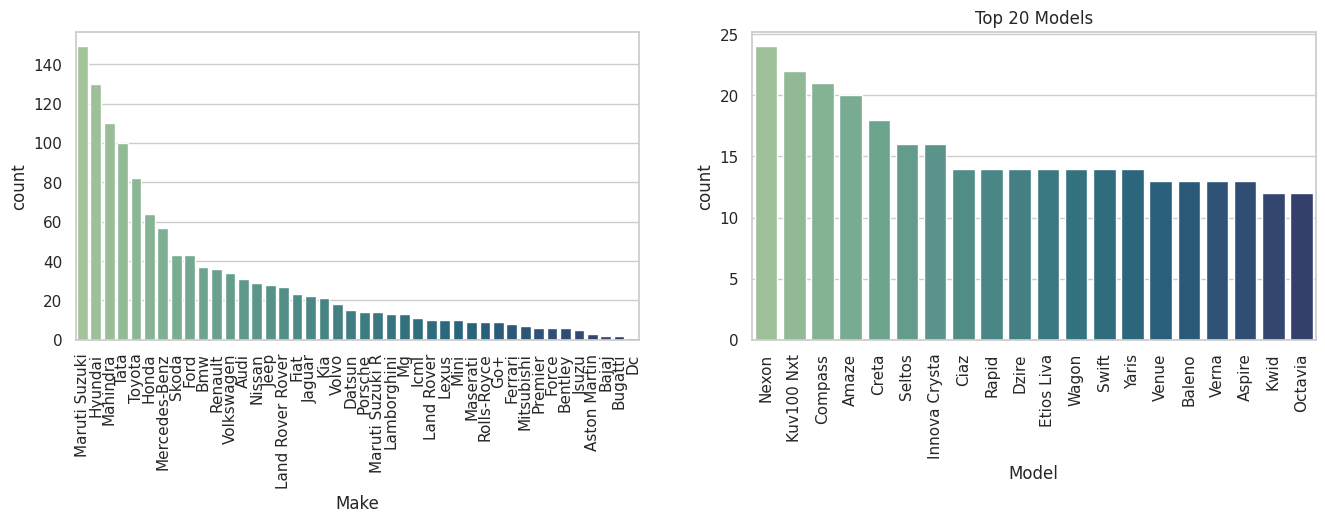

In [878]:
# Create side by side bar plot
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Count of car Makers
sns.countplot(data=data, x='Make', palette='crest', order=data['Make'].value_counts().index, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

# Count plot for the top 20 models
top_twenty_model = data['Model'].value_counts().head(20).index
sns.countplot(data=data[data['Model'].isin(top_twenty_model)], x='Model', order=top_twenty_model, palette='crest', ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('Top 20 Models')

**Observation :**


1.  In the first count plot we can see that ```Maruti Suzuki``` is leading in tearms of most number of cars and ```DC``` Has leat number of cars.
2.  Second chart is about Count of car model name & ```Nexon``` has highest number among all



### Histogram

**Histogram of "Ex-Showroom Price"**

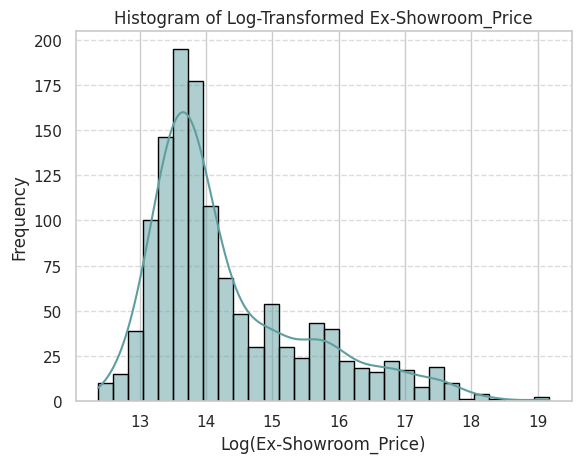

In [879]:
data['Ex-Showroom_Price_Log'] = np.log1p(data['Ex-Showroom_Price'])

# Create a histogram with log scale
sns.histplot(data['Ex-Showroom_Price_Log'], bins=30, kde=True, color='cadetblue', edgecolor='black')

# Add labels and title
plt.xlabel('Log(Ex-Showroom_Price)')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Ex-Showroom_Price')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

* Obaservation
1. Distribution of graph is right skewed & Most cars preffered by indian is 13-14 lakhs.

**Histogram of "Displacement in cc"**

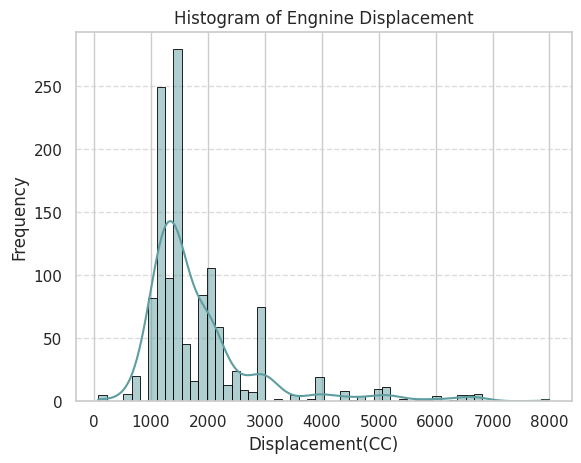

In [880]:
sns.histplot(data['Displacement'],  kde=True, color='cadetblue', edgecolor='black')

# Add labels and title
plt.xlabel('Displacement(CC)')
plt.ylabel('Frequency')
plt.title('Histogram of Engnine Displacement')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

* Observation :
1. Distribution of engine displacement is right skewed.
2. In India most of the cars displacement range between 1000cc - 2000cc.

Histogram of Power and tourque

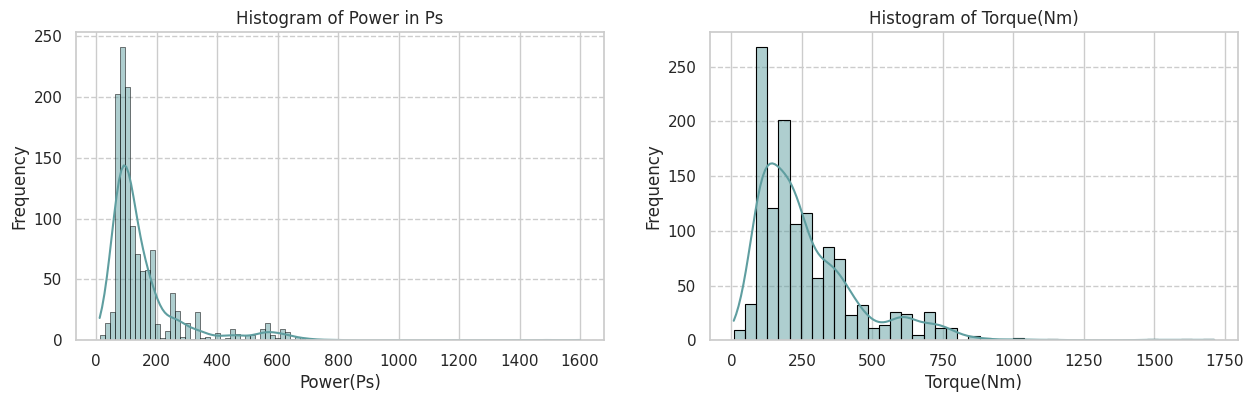

In [881]:
ax,axes=plt.subplots(1,2, figsize=(15,4))

# Histogram of Power
sns.histplot(data['Power_PS'],  kde=True, color='cadetblue', edgecolor='black',ax=axes[0])
# Add labels and title
axes[0].set_xlabel('Power(Ps)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Power in Ps')
# Add grid lines
axes[0].grid(axis='y', linestyle='--')

#Histogram of tourque
sns.histplot(data['Torque_Nm'],  kde=True, color='cadetblue', edgecolor='black',ax=axes[1])
# Add labels and title
axes[1].set_xlabel('Torque(Nm)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Torque(Nm)')
# Add grid lines
axes[1].grid(axis='y', linestyle='--')

# Show the plot
plt.show()

* Observation
1. First histogram is of power in ps which is right skewed and most of the cars power rangeses between 0-200PS.
2. Second Histogram is of Torque data which is right skewed and most of the data range between 0-250Nm.

### CountPlots

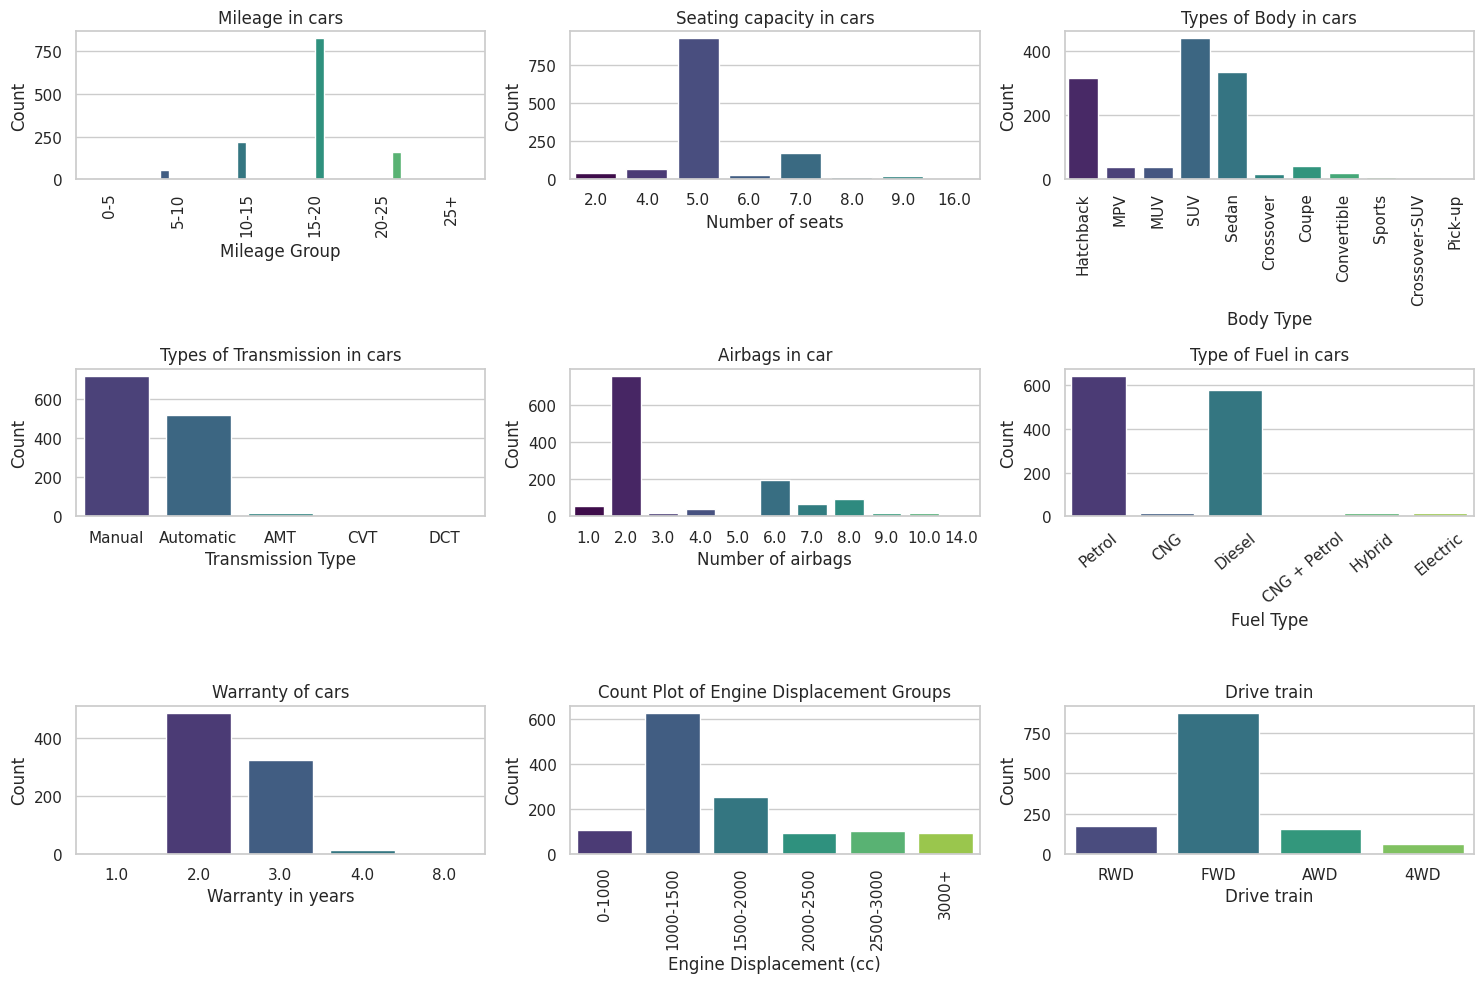

In [882]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Row-1
#Mileage
# Create bins for engine displacement
bins = [0, 5, 10, 15, 20, 25, float('inf')]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25+']
# Assign each 'Displacement' value to a bin
data['mileage_Group'] = pd.cut(data['Final_Mileage'], bins=bins, labels=labels, right=False)
# Modify this line to fix the warning
sns.countplot(data=data, x='mileage_Group', hue='mileage_Group', palette='viridis', ax=axes[0, 0], legend=False)
axes[0, 0].set_xlabel('Mileage Group')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Mileage in cars')
axes[0, 0].tick_params(axis='x', rotation=90)

# Seat Capacity
sns.countplot(data=data,x='Seating_Capacity', hue='Seating_Capacity', palette='viridis', ax=axes[0, 1], legend=False)
axes[0, 1].set_xlabel('Number of seats')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Seating capacity in cars')

# Body type
sns.countplot(data=data, x='Body_Type', hue='Body_Type', palette='viridis', ax=axes[0, 2], legend=False)
axes[0, 2].set_xlabel('Body Type')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Types of Body in cars')
axes[0, 2].tick_params(axis='x', rotation=90)

#Row-2
#Transmission type
sns.countplot(data=data,x='Transmission_Type',hue='Transmission_Type', palette='viridis', ax=axes[1, 0], legend=False)
axes[1, 0].set_xlabel('Transmission Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Types of Transmission in cars')

# Air bags
sns.countplot(data=data,x='Number_of_Airbags', hue='Number_of_Airbags', palette='viridis', ax=axes[1, 1], legend=False)
axes[1, 1].set_xlabel('Number of airbags')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Airbags in car')

#Fuel type
sns.countplot(data=data,x='Fuel_Type',hue='Fuel_Type', palette='viridis',ax=axes[1, 2], legend=False)
axes[1, 2].set_xlabel('Fuel Type')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('Type of Fuel in cars')
axes[1, 2].tick_params(axis='x', rotation=40)

#Row-3
# warrenty in years
sns.countplot(data=data,x='Basic_Warranty_years', hue='Basic_Warranty_years',palette='viridis',ax=axes[2, 0], legend=False)
axes[2, 0].set_xlabel('Warranty in years')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Warranty of cars')

#Displacement of engine
# Create bins for engine displacement
bins = [0, 1000, 1500, 2000, 2500, 3000, float('inf')]
labels = ['0-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000+']
# Assign each 'Displacement' value to a bin
data['Displacement_Group'] = pd.cut(data['Displacement'], bins=bins, labels=labels, right=False)
sns.countplot(data=data, x='Displacement_Group',  hue='Displacement_Group',palette='viridis',ax=axes[2, 1], legend=False)
axes[2, 1].set_xlabel('Engine Displacement (cc)')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Count Plot of Engine Displacement Groups')
axes[2, 1].tick_params(axis='x', rotation=90)

# Drivetrain
sns.countplot(data=data,x='Drivetrain', hue='Drivetrain',palette='viridis',ax=axes[2, 2], legend=False)
axes[2, 2].set_xlabel('Drive train')
axes[2, 2].set_ylabel('Count')
axes[2, 2].set_title('Drive train')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

* Observation


1.   ```Mileage``` : In India most of the cars mileage ranges between 15-20kmpl.
2.   ```Seats``` : Most of the cars are 5 seater and very least of 2 or 16 seater.
3. ```Body Type``` : Contry like India most people prefers SUV, Sedan & Hatchback.
4. ```Transmission Type``` : In India most of the cars have Mannual Transmission and very leat car CVT & DCT Transmission.
5. ```Airbgs``` : After seeing count plot we can say that most of the cars in india car not safe.
6. ``` Fuel type``` : Majority of cars uses Pertol and deasel.
7. ```Warranty``` : Majority of cars comes with 2 years of warranty.
8. ``` Displacement``` : Majority of cars displacement range between 1000-1500CC.
9. ```Drive Train```: In India Majority of cars are Front Wheel Drive.



### Pie Charts

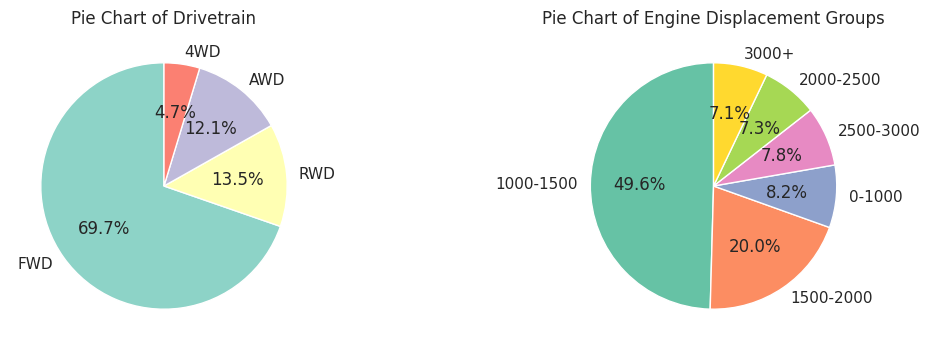

In [883]:
fig,axes=plt.subplots(1,2,figsize=(13,4))

# Drivetain
drivetrain_counts = data['Drivetrain'].value_counts()
# Create a pie chart with custom colors
axes[0].pie(drivetrain_counts, labels=drivetrain_counts.index, autopct='%1.1f%%', startangle=90, colors= plt.cm.Set3.colors)
# Title
axes[0].set_title('Pie Chart of Drivetrain')

# Engine Displacement
displacement_counts = data['Displacement_Group'].value_counts()
# Create a pie chart
axes[1].pie(displacement_counts, labels=displacement_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set2.colors)
# Title
axes[1].set_title('Pie Chart of Engine Displacement Groups')

# Show the plot
plt.show()

* Obaservation:
1.  In India Majority of cars are Front Wheel Drive and very least cars comes with 4WD.
2. Majority of cars displacement range between 1000-1500CC.

### Box Plot

<Axes: xlabel='Displacement'>

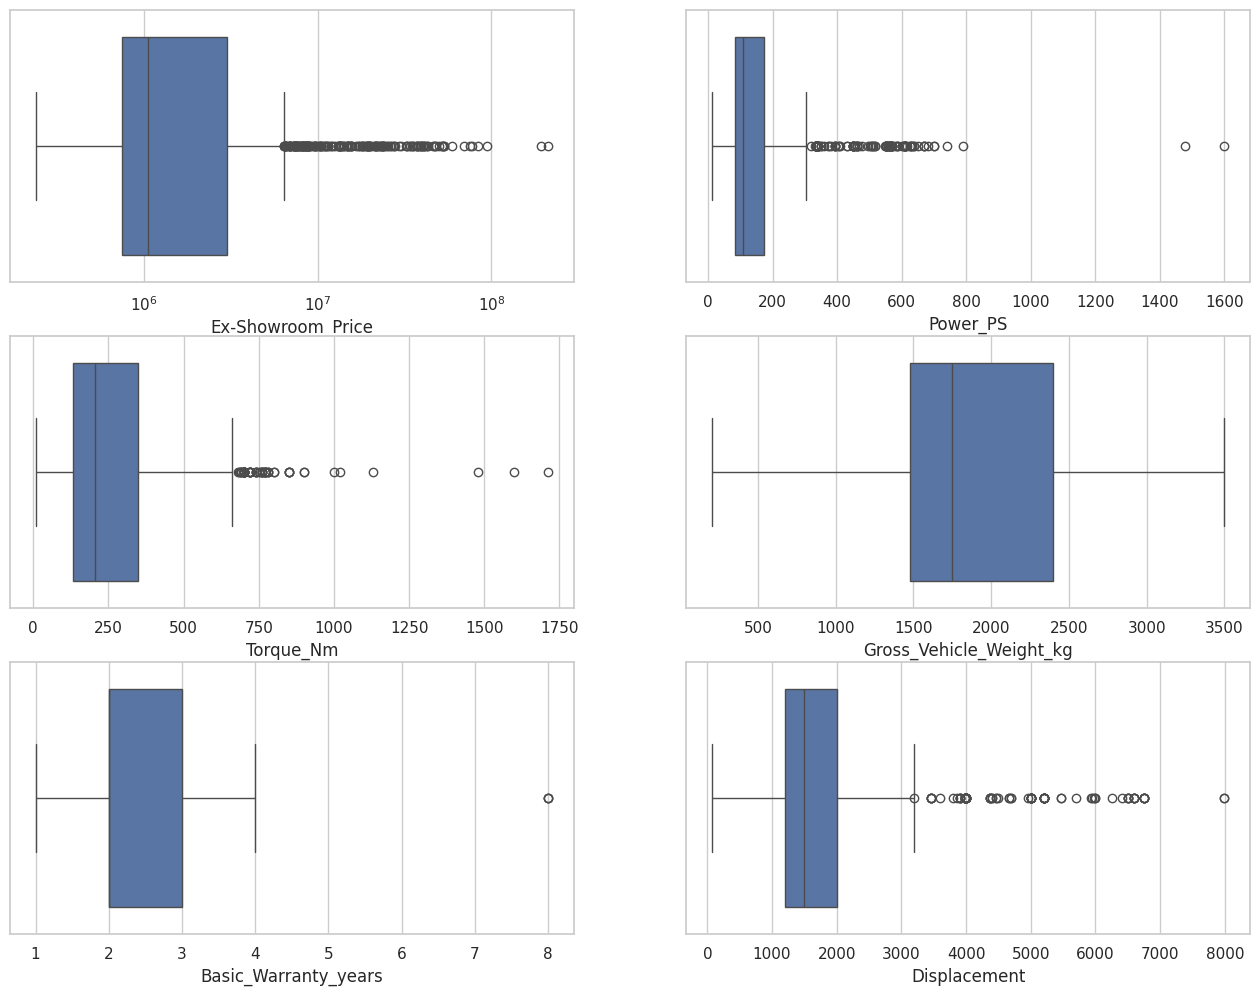

In [884]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

#Ex-showroom price
sns.boxplot(data=data, x='Ex-Showroom_Price',ax=axes[0,0])
axes[0, 0].set_xscale('log')

# Power in ps
sns.boxplot(data=data, x='Power_PS',ax=axes[0,1])

#Tourque
sns.boxplot(data=data, x='Torque_Nm',ax=axes[1,0])

#Vehicle gross weight
sns.boxplot(data=data, x='Gross_Vehicle_Weight_kg',ax=axes[1,1])

#Warranty in year
sns.boxplot(data=data, x='Basic_Warranty_years',ax=axes[2,0])

# displacement
sns.boxplot(data=data, x='Displacement',ax=axes[2,1])


## Data Vizualization: Bivariate

### Correlation Heatmap

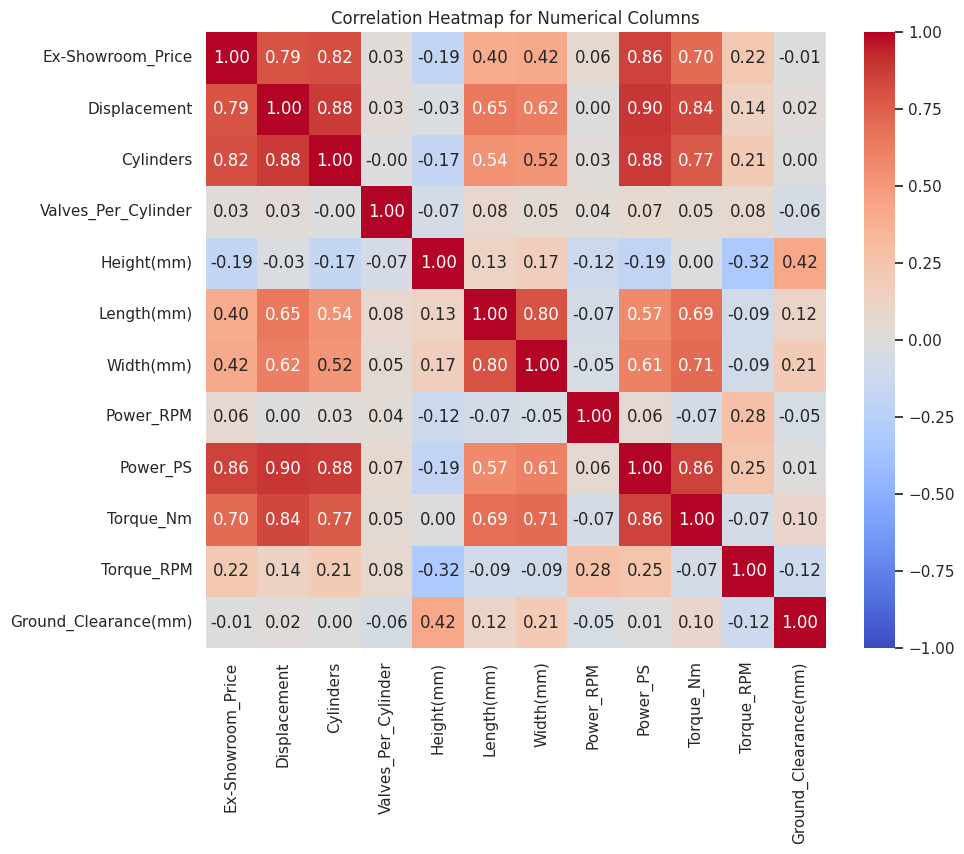

In [885]:
numerical_columns = ['Ex-Showroom_Price', 'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Height(mm)', 'Length(mm)', 'Width(mm)','Power_RPM', 'Power_PS', 'Torque_Nm','Torque_RPM', 'Ground_Clearance(mm)']

correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

### Pair Plot

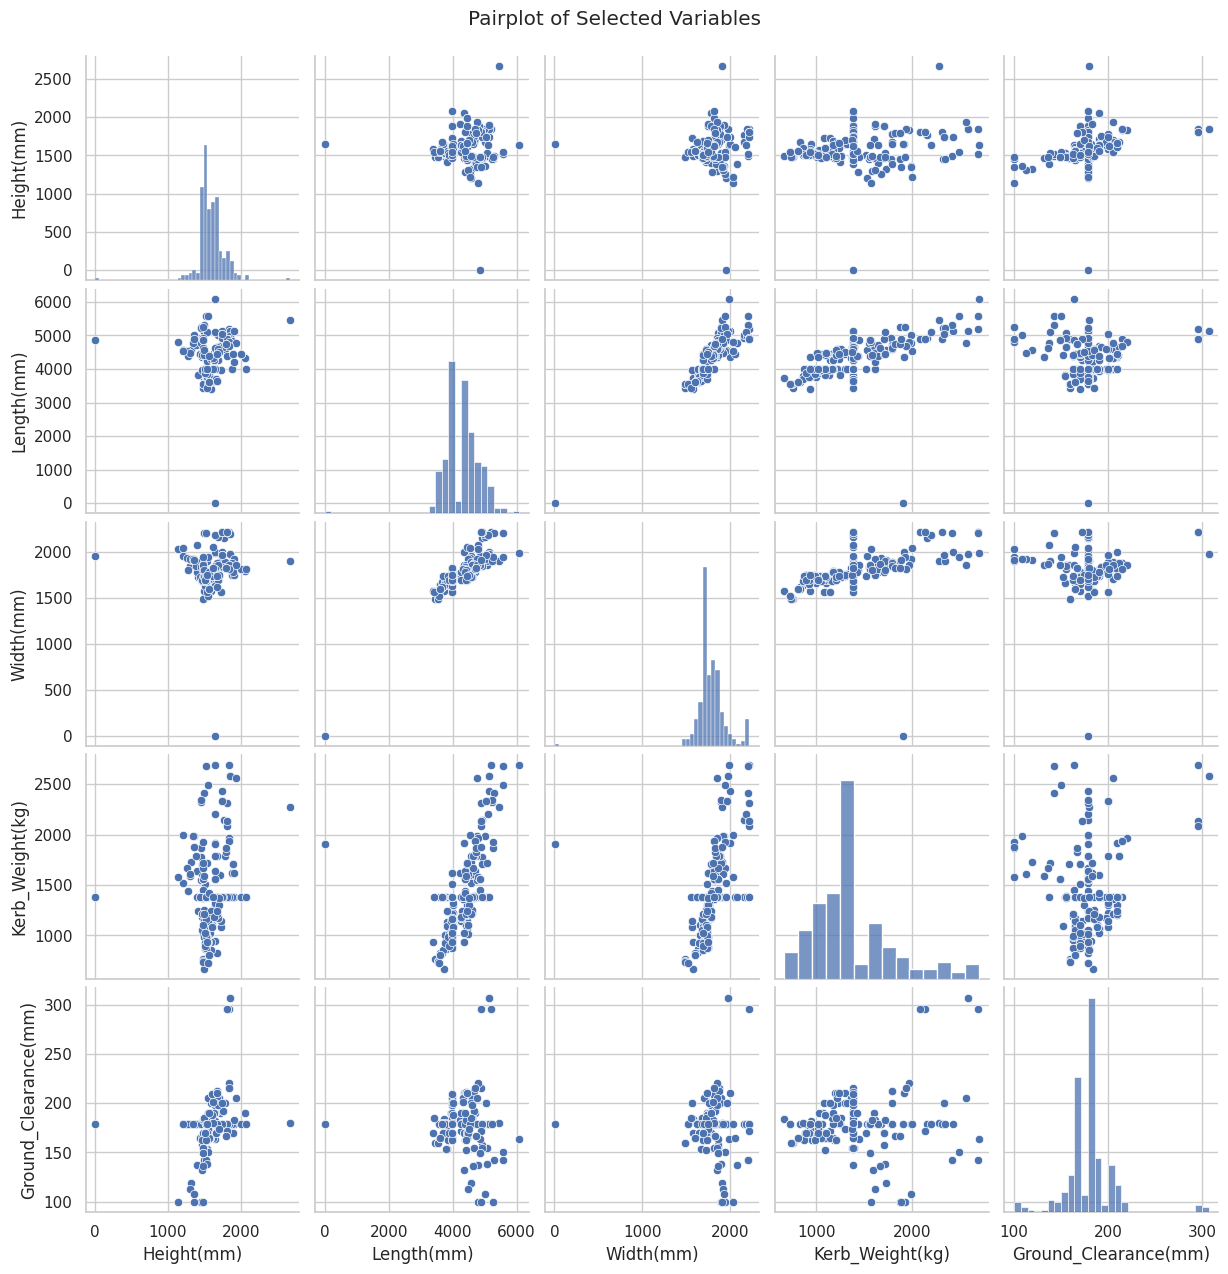

In [886]:
# Pairplot for selected numeric variables
variables = ['Height(mm)', 'Length(mm)', 'Width(mm)', 'Kerb_Weight(kg)', 'Ground_Clearance(mm)']
# Subsample the data
subsampled_data = data.sample(frac=0.2, random_state=42)

# Pairplot for selected numeric variables with subsampled data
sns.pairplot(subsampled_data[variables])
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()


### 12. Pair scatter plot for Torque and Power vs Price

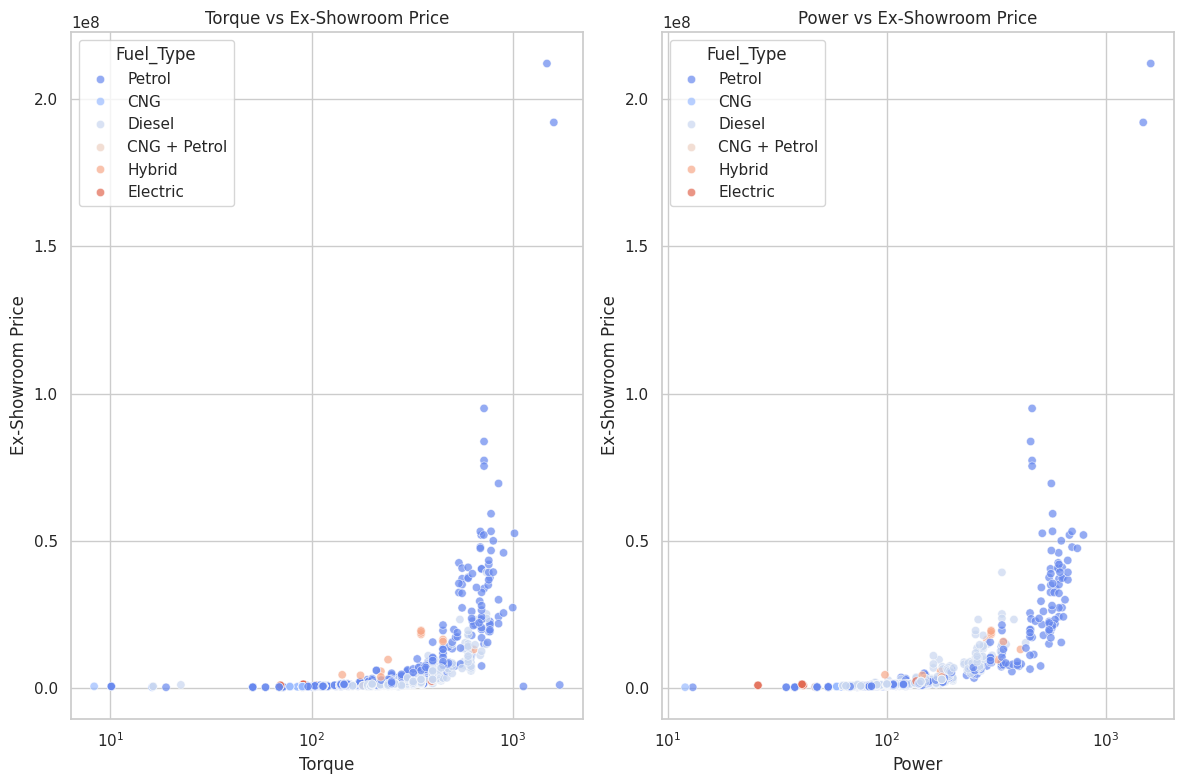

In [887]:
plt.figure(figsize=(12, 8))

# Scatter plot for Torque vs Rs_Price with logarithmic scale for Torque
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Torque_Nm', y='Ex-Showroom_Price', alpha=0.7, hue = 'Fuel_Type', palette = 'coolwarm')
plt.xscale('log')
plt.title('Torque vs Ex-Showroom Price')
plt.xlabel('Torque')
plt.ylabel('Ex-Showroom Price')

# Scatter plot for Power vs Rs_Price with logarithmic scale for Power
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Power_PS', y='Ex-Showroom_Price', alpha=0.7,hue = 'Fuel_Type', palette = 'coolwarm')
plt.xscale('log')
plt.title('Power vs Ex-Showroom Price')
plt.xlabel('Power')
plt.ylabel('Ex-Showroom Price')

plt.tight_layout()
plt.show()

### Bar Plot

<ipython-input-888-d7c7b17a9b11>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




Text(0.5, 0, 'Fuel Type')

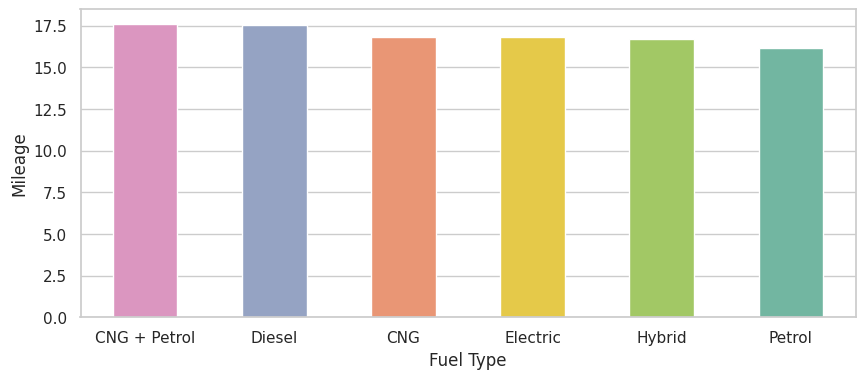

In [888]:
# Sort the data by mean mileage in descending order
sorted_data = data.groupby('Fuel_Type')['Final_Mileage'].mean().sort_values(ascending=False).index
# Bar chart with hue for Fuel Type vs Mileage mean
plt.figure(figsize=(10, 4))
sns.barplot(data=data, x='Fuel_Type', y='Final_Mileage', hue='Fuel_Type', ci=False, palette='Set2', dodge=False, order=sorted_data, width=0.5)
plt.ylabel("Mileage")
plt.xlabel("Fuel Type")

### Stacked Bar charts

In [889]:
price_bins = [0, 1000000, 2000000, 3000000, float('inf')]
price_labels = ['0-1000000', '1000000-2000000', '2000000-3000000', '3000000+']
data['Price_Segment'] = pd.cut(data['Ex-Showroom_Price'], bins=price_bins, labels=price_labels, right=False)

# Sort fuel types in descending order
sorted_fuel_types = sorted(data['Fuel_Type'].unique(), reverse=True)

# Create a stacked bar chart for Price Segment vs Fuel Type using Plotly
fig = px.histogram(data, x='Fuel_Type', color='Price_Segment', barmode='stack',
                   category_orders={'Fuel_Type': sorted_fuel_types},
                   labels={'Fuel_Type': 'Fuel Type', 'Price_Segment': 'Price Segment'},
                   title='Price Segment Distribution by Fuel Type')

fig.update_layout(xaxis_title='Fuel Type', yaxis_title='Count (log scale)', legend_title='Price Segment', yaxis_type="log")

# Sort bars in decreasing order
fig.update_xaxes(categoryorder='total descending')

fig.show()

### violin plot

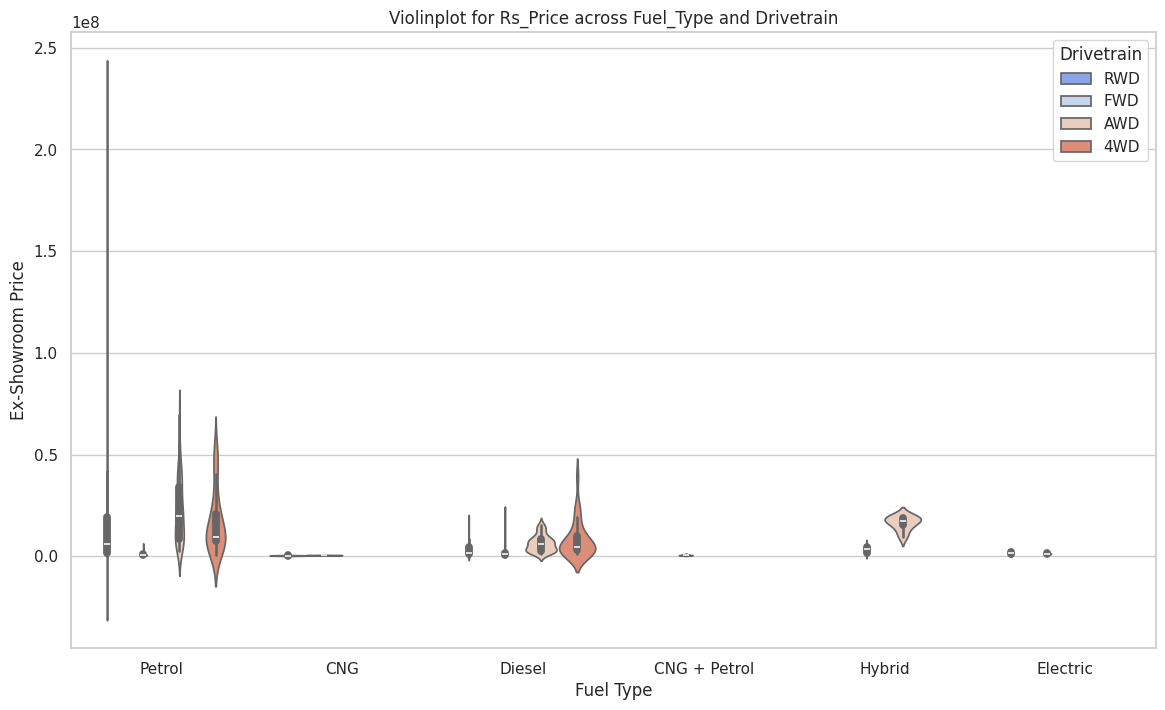

In [890]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=data, x='Fuel_Type', y='Ex-Showroom_Price', hue='Drivetrain', palette='coolwarm')
plt.ylabel("Ex-Showroom Price")
plt.xlabel("Fuel Type")
plt.title('Violinplot for Rs_Price across Fuel_Type and Drivetrain')
plt.show()

### Swarmplot for Price vs Fueltype with Drive train

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

85.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

77.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



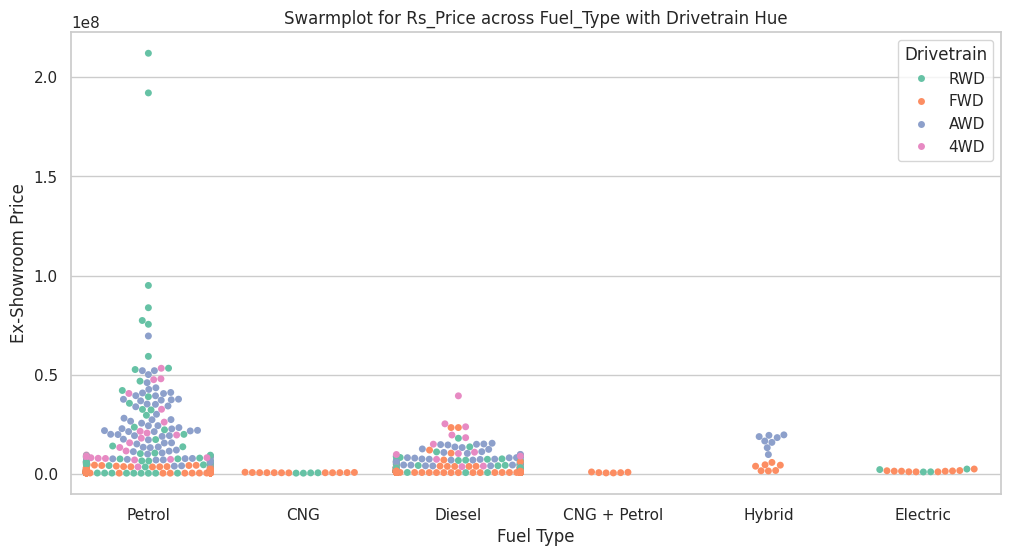

In [891]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=data, x='Fuel_Type', y='Ex-Showroom_Price', hue='Drivetrain', palette='Set2')
plt.title('Swarmplot for Rs_Price across Fuel_Type with Drivetrain Hue')
plt.ylabel("Ex-Showroom Price")
plt.xlabel("Fuel Type")
plt.show()